<a href="https://colab.research.google.com/github/theaok/vis/blob/main/all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks

You can just edit/adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps

While can diff on GitHub, its clunky, better here: File-Revision History

make webbrowser fullscreen and collapse upper menu (arrow on the right)

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas

# DAT MAN: pandas, your lib for all data mgmt, most stats, (and much vis)


note:  pandas is kind of like stata, or more like r, and helps a lot with traditional data

REFS:

https://jakevdp.github.io/PythonDataScienceHandbook/

https://www.youtube.com/watch?v=5rNu16O3YNE&t=3676s

https://www.danielmsullivan.com/pages/tutorial_stata_to_python.html


<br>stata:<br>
https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html and on the left there's also r, sas, spreadsheet

https://aeturrell.github.io/coding-for-economists/coming-from-stata.html

https://towardsdatascience.com/going-from-stata-to-pandas-706888525acf

http://statapython.blogspot.com/ <br><br>



http://www.dataschool.io/best-python-pandas-resources/

https://www.dataquest.io/blog/pandas-python-tutorial/

many great tutorials for self study:
https://pandas.pydata.org/pandas-docs/stable/tutorials.html<br><br>

tutorials in notebooks (just click on folder and may just go straight to one with solutions
and run them in Python):

https://github.com/guipsamora/pandas_exercises/tree/master/01_Getting_%26_Knowing_Your_Data

https://github.com/guipsamora/pandas_exercises/tree/master/06_Stats  

https://github.com/guipsamora/pandas_exercises/tree/master/07_Visualization




### [jan23] dive into python: load real data (csv file), and basics                                                

note: can collapse sec, and run all cells at once--use some nice markdown esp collapsable sections
https://colab.research.google.com/notebooks/markdown_guide.ipynb
   
let's do an example, your first ps will be sth like that but using your own data                                                             

In [ ]:
#download file from online and save in colab as ex1.csv; note it's from: https://conjointly.com/kb/correlation-statistic/
#urllib.request.urlretrieve("https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download", "ex1.csv")
!wget -q -O ex1.csv https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download

In [ ]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
ex1.csv  sample_data


In [ ]:
dat=pd.read_csv('ex1.csv') #read it in  ; or full path: '/content/ex1.csv'

In [ ]:
dat.columns #list var names

Index(['Person', 'Height', 'Self Esteem'], dtype='object')

In [ ]:
dat.head(2)
dat.tail(2)

Person  Height  Self Esteem
0       1      68          4.1
1       2      71          4.6

Person  Height  Self Esteem
18      19      63          3.4
19      20      61          3.6

In [ ]:
dat #get spreadsheet view: can sort on cols, filter, and copy

Person  Height  Self Esteem
0        1      68          4.1
1        2      71          4.6
2        3      62          3.8
3        4      75          4.4
4        5      58          3.2
5        6      60          3.1
6        7      67          3.8
7        8      68          4.1
8        9      71          4.3
9       10      69          3.7
10      11      68          3.5
11      12      67          3.2
12      13      63          3.7
13      14      62          3.3
14      15      60          3.4
15      16      63          4.0
16      17      65          4.1
17      18      67          3.8
18      19      63          3.4
19      20      61          3.6

In [ ]:
dat["Height"][0:3] #subset or slice

0    68
1    71
2    62
Name: Height, dtype: int64

In [ ]:
#keep it simple! especially when figuring things out! keep only vars needed, say 5 or 10
#dont have a dataset with 500vars--you won't use them! just clutter and mess!
#and then later whenever you need more vars, just rerun the code retaining more
dat[["Height","Self Esteem"]][0:3]

Height  Self Esteem
0      68          4.1
1      71          4.6
2      62          3.8

In [ ]:
# if data big take random sample! way better to learn and figure things out with small sample!!
# say frac=.1 for 10perc, or n=10 for 10obs
dat.sample(frac=0.5, replace=False, random_state=1) #random_state to ensure reproducibility of results;

Person  Height  Self Esteem
3        4      75          4.4
16      17      65          4.1
6        7      67          3.8
10      11      68          3.5
2        3      62          3.8
14      15      60          3.4
4        5      58          3.2
17      18      67          3.8
7        8      68          4.1
1        2      71          4.6

In [ ]:
#dat["Height"]

In [ ]:
dat["Height"].mean() # median, mode, stdev

65.4

In [ ]:
dat["Height"].value_counts(dropna=False) #.nlargest(3) a tab or freq table

Height
68    3
67    3
63    3
71    2
62    2
60    2
75    1
58    1
69    1
65    1
61    1
Name: count, dtype: int64

<Axes: >

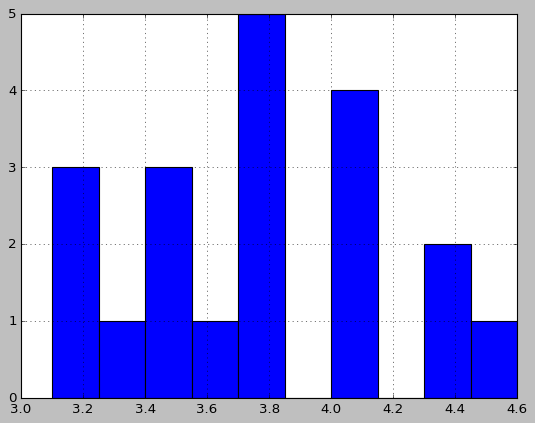

In [ ]:
dat["Self Esteem"].hist() #again, always interpret all output

In [ ]:
pd.crosstab(dat["Height"], dat["Self Esteem"]) #too many numbers for a crosstab!

Self Esteem  3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  4.0  4.1  4.3  4.4  4.6
Height                                                                      
58             0    1    0    0    0    0    0    0    0    0    0    0    0
60             1    0    0    1    0    0    0    0    0    0    0    0    0
61             0    0    0    0    0    1    0    0    0    0    0    0    0
62             0    0    1    0    0    0    0    1    0    0    0    0    0
63             0    0    0    1    0    0    1    0    1    0    0    0    0
65             0    0    0    0    0    0    0    0    0    1    0    0    0
67             0    1    0    0    0    0    0    2    0    0    0    0    0
68             0    0    0    0    1    0    0    0    0    2    0    0    0
69             0    0    0    0    0    0    1    0    0    0    0    0    0
71             0    0    0    0    0    0    0    0    0    0    1    0    1
75             0    0    0    0    0    0    0    0    0    0    0    1    0

<Axes: xlabel='Height', ylabel='Self Esteem'>

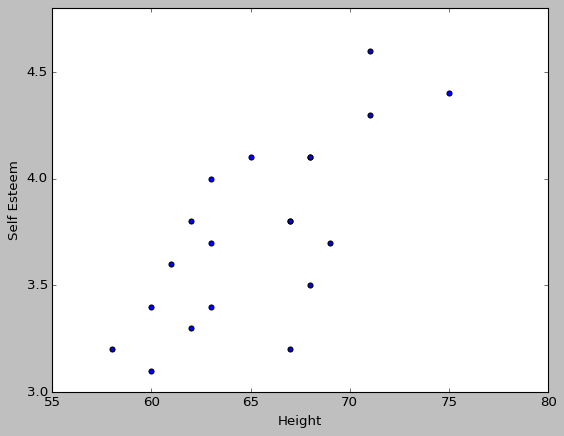

In [ ]:
dat.plot(kind='scatter', y='Self Esteem', x='Height')

In [ ]:
dat[['Height','Self Esteem']].corr().round(2)

Height  Self Esteem
Height         1.00         0.73
Self Esteem    0.73         1.00

### [jan30] I/O import/export, and des sta
can import-export many formats incl xls, stata, sas:
https://pandas.pydata.org/docs/user_guide/io.html

if you work a lot with xls ☹  check out:

https://realpython.com/openpyxl-excel-spreadsheets-python/

https://automatetheboringstuff.com/chapter12/


In [ ]:
#lets start with html, and especially handy wikipedia
#for match use header of col (not table!!); ideally unique; case may matter
pd.read_html('https://en.wikipedia.org/wiki/List_of_counties_in_New_Jersey',match='Density',flavor=None)[0].head(3)
#pd.read_html("https://en.wikipedia.org/wiki/Premier_League", match = "Position")[0].head(3)
#pd.read_html('https://en.wikipedia.org/wiki/List_of_towns_in_India_by_population',match="Name of Town")[0].head(5)
#https://towardsdatascience.com/how-to-use-wikipedia-as-a-data-source-3dfea29e6539
#https://towardsdatascience.com/2-easy-ways-to-get-tables-from-a-website-with-pandas-b92fc835e741 some more ideas

County  FIPS code[12] County seat[13]  \
0    Atlantic County              1    Mays Landing   
1      Bergen County              3      Hackensack   
2  Burlington County              5     Mount Holly   

             Largest City[14]  Est.[13]  \
0  Egg Harbor Township 47,842      1837   
1           Hackensack 46,030      1683   
2     Evesham Township 46,826      1694   

                                   Formed from[6][7]  \
0                                  Gloucester County   
1  One of four original counties created in East ...   
2  One of two original counties created in West J...   

                                       Named for[15]  Density (per mi2)  \
0  The Atlantic Ocean, which forms the county's e...             490.58   
1                  Bergen, New Netherland settlement            4092.89   
2  The old ancient name for an inland market near...             582.82   

   Pop.[16]               Area[13]  Map  
0    275213  561 sq mi (1,453 km2)  NaN  
1    957736    234 sq mi (606 km2)  NaN  
2    469167  805 sq mi (2,085 km2)  NaN

In [ ]:
urllib.request.urlretrieve("https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download", "auto.dta")
auto=pd.read_stata('auto.dta') #load stata data
auto.head(2)
#auto.to_stata('stata.dta') #save as stata data

#useful to set index to sth meaningful as opposed to 0,1,2
#auto = auto.set_index('make')

('auto.dta', <http.client.HTTPMessage at 0x7b5846601a90>)

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
0  AMC Concord   4099   22    3.0       2.5     11    2930     186    40   
1    AMC Pacer   4749   17    3.0       3.0     11    3350     173    40   

   displacement  gear_ratio   foreign  
0           121        3.58  Domestic  
1           258        2.53  Domestic

In [ ]:
auto.to_excel('auto.xlsx', sheet_name = 'testing', index = False) #save as xls
excelTest1 = pd.read_excel('auto.xlsx', 0)
excelTest1.head(2)
excelTest1.tail(2)

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
0  AMC Concord   4099   22    3.0       2.5     11    2930     186    40   
1    AMC Pacer   4749   17    3.0       3.0     11    3350     173    40   

   displacement  gear_ratio   foreign  
0           121        3.58  Domestic  
1           258        2.53  Domestic

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
72  VW Scirocco   6850   25    4.0       2.0     16    1990     156    36   
73    Volvo 260  11995   17    5.0       2.5     14    3170     193    37   

    displacement  gear_ratio  foreign  
72            97        3.78  Foreign  
73           163        2.98  Foreign

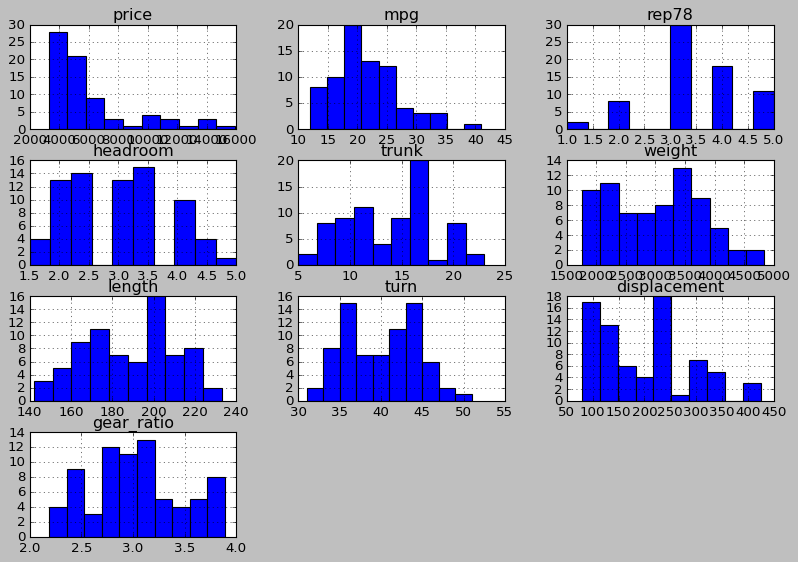

In [ ]:
#dir(auto) # all the stuff you can do on auto :)
#dir(auto.price) #and stuff you can do on price var
auto.hist(figsize=(12,8)); # eg hist

In [ ]:
#auto['make'][0] #py counts from zero!
auto['make'][0:3]
#auto[['weight', 'length']][0:3]   #note that need to double [[ ]]
# can also use loc or iloc to subset/slice on both rows and cols

0    AMC Concord
1      AMC Pacer
2     AMC Spirit
Name: make, dtype: object

In [ ]:
max(auto['mpg'])
print() #just add space
min(auto['mpg'])
#auto['mpg'].max()
#auto['mpg'].min()
#auto['mpg'].median()
#auto['mpg'].mean()
#auto['mpg'].std()

41

12

In [ ]:
#subsetting on condition
auto.make[auto.mpg<15]
#auto['make'][auto['mpg']<15]
#auto.make[auto.mpg.isin([11,12,13,14])]

10         Cad. Deville
11        Cad. Eldorado
25    Linc. Continental
26         Linc. Mark V
27     Linc. Versailles
29         Merc. Cougar
32           Merc. XR-7
63          Peugeot 604
Name: make, dtype: object

In [ ]:
auto.make[(auto.mpg<15) | (auto.mpg>40)] #https://stackoverflow.com/questions/22591174/pandas-multiple-conditions-while-indexing-data-frame-unexpected-behavior

10         Cad. Deville
11        Cad. Eldorado
25    Linc. Continental
26         Linc. Mark V
27     Linc. Versailles
29         Merc. Cougar
32           Merc. XR-7
63          Peugeot 604
70            VW Diesel
Name: make, dtype: object

In [ ]:
#subsetting using query
#auto.query("mpg<15  & foreign=='Foreign'")
#auto.query("weight <2000 | length <150")
auto.query("weight + length <2000")

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
23     Ford Fiesta   4389   28    4.0       1.5      9    1800     147    33   
42     Plym. Champ   4425   34    5.0       2.5     11    1800     157    37   
61     Honda Civic   4499   28    4.0       2.5      5    1760     149    34   
64  Renault Le Car   3895   26    3.0       3.0     10    1830     142    34   

    displacement  gear_ratio   foreign  
23            98        3.15  Domestic  
42            86        2.97  Domestic  
61            91        3.30   Foreign  
64            79        3.72   Foreign

In [ ]:
#len(auto) #stata: count
auto.shape #74 obs, 12 vars

(74, 12)

In [ ]:
auto.dtypes #stata: des ; BUT note no str but object and category

make              object
price              int16
mpg                int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
auto.select_dtypes(include = ['float32']).head(2)

headroom  gear_ratio
0       2.5        3.58
1       3.0        2.53

In [ ]:
#auto.filter(like='wei').head(2) #stata: lookfor wei
auto.filter(regex='.*t$').head(2)

weight  displacement
0    2930           121
1    3350           258

In [ ]:
auto.make[0:5] #note dtype

0      AMC Concord
1        AMC Pacer
2       AMC Spirit
3    Buick Century
4    Buick Electra
Name: make, dtype: object

In [ ]:
auto.foreign[0:5] #note dtype and categories

0    Domestic
1    Domestic
2    Domestic
3    Domestic
4    Domestic
Name: foreign, dtype: category
Categories (2, object): ['Domestic' < 'Foreign']

In [ ]:
#auto.describe() #stata: sum
auto.describe().T.round(2) #T just transposes

count     mean      std      min      25%      50%      75%  \
price          74.0  6165.26  2949.50  3291.00  4220.25  5006.50  6332.25   
mpg            74.0    21.30     5.79    12.00    18.00    20.00    24.75   
rep78          69.0     3.41     0.99     1.00     3.00     3.00     4.00   
headroom       74.0     2.99     0.85     1.50     2.50     3.00     3.50   
trunk          74.0    13.76     4.28     5.00    10.25    14.00    16.75   
weight         74.0  3019.46   777.19  1760.00  2250.00  3190.00  3600.00   
length         74.0   187.93    22.27   142.00   170.00   192.50   203.75   
turn           74.0    39.65     4.40    31.00    36.00    40.00    43.00   
displacement   74.0   197.30    91.84    79.00   119.00   196.00   245.25   
gear_ratio     74.0     3.01     0.46     2.19     2.73     2.96     3.35   
mpgNU          74.0    21.30     5.79    12.00    18.00    20.00    24.75   
colOfOnes      74.0     2.11     0.93     2.00     2.00     2.00     2.00   

                   max  
price         15906.00  
mpg              41.00  
rep78             5.00  
headroom          5.00  
trunk            23.00  
weight         4840.00  
length          233.00  
turn             51.00  
displacement    425.00  
gear_ratio        3.89  
mpgNU            41.00  
colOfOnes        10.00

In [ ]:
auto[['price','mpg','foreign']].groupby('foreign').describe().round(2)
#auto[['price','mpg','foreign']].groupby('foreign').median()

price                                                             \
         count     mean      std     min     25%     50%     75%      max   
foreign                                                                     
Domestic  52.0  6072.42  3097.10  3291.0  4185.5  4782.5  6199.5  15906.0   
Foreign   22.0  6384.68  2621.92  3748.0  4521.5  5759.0  7067.5  12990.0   

           mpg                                              
         count   mean   std   min    25%   50%   75%   max  
foreign                                                     
Domestic  52.0  19.83  4.74  12.0  16.75  19.0  22.0  34.0  
Foreign   22.0  24.77  6.61  14.0  21.00  24.5  27.5  41.0

In [ ]:
#auto[['make', 'price', 'mpg', 'rep78', 'foreign']].head(3) #first 3 obs; stata: l make price mpg rep78 foreign in 1/3
auto.sort_values(by='mpg')[['mpg','make','price']][0:3] #3 cars with lowest mpg

mpg               make  price
26   12       Linc. Mark V  13594
25   12  Linc. Continental  11497
29   14       Merc. Cougar   5379

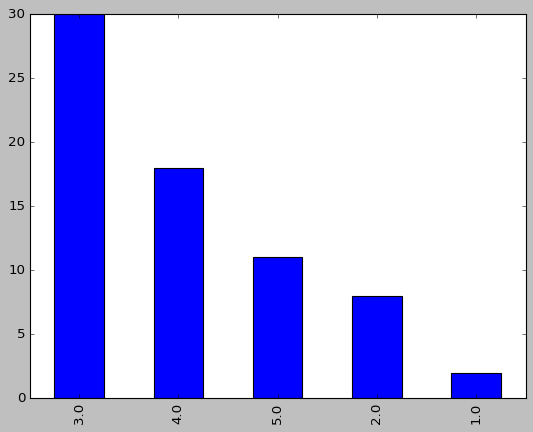

In [ ]:
#auto['rep78'].value_counts() #.nlargest(3)#stata: ta rep78
auto['rep78'].value_counts(dropna=False).plot(kind='bar') #.nlargest(3) #stata can do plot too of tab in ascii
#auto.groupby('rep78').count() #just show counts of rep78 by other vars

In [ ]:
# stata: ta rep78 foreign
pd.crosstab(auto.rep78, auto.foreign) # crosstab
#pd.crosstab(auto.rep78, auto.foreign,normalize='columns') # col prop (normalize columns)
#pd.crosstab(auto.rep78, auto.foreign,normalize='index') #row prop (normalize rows)
#pd.crosstab(auto.rep78, auto.foreign,normalize='all') #cell prop

foreign  Domestic  Foreign
rep78                     
1.0             2        0
2.0             8        0
3.0            27        3
4.0             9        9
5.0             2        9

In [ ]:
#stata: bys foreign: sum mpg
auto.groupby(by=auto.foreign)['mpg'].mean().round(2) #mpg mean by foreign

<ipython-input-6-3f304371aa46>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  auto.groupby(by=auto.foreign)['mpg'].mean().round(2) #mpg mean by foreign


foreign
Domestic    19.83
Foreign     24.77
Name: mpg, dtype: float64

In [ ]:
pd.pivot_table(auto, index='foreign', values='mpg', aggfunc='mean').round(2)

mpg
foreign            
Domestic  19.826923
Foreign   24.772727

In [ ]:
pd.pivot_table(auto, index=['rep78','foreign'], values= 'mpg' , aggfunc=['median','std','min','max']).round(1)

median  std min max
                  mpg  mpg mpg mpg
rep78 foreign                     
1.0   Domestic     21  4.2  18  24
2.0   Domestic     18  3.8  14  24
3.0   Domestic     19  4.1  12  29
      Foreign      23  2.5  21  26
4.0   Domestic     18  4.6  14  28
      Foreign      25  2.7  21  30
5.0   Domestic     32  2.8  30  34
      Foreign      25  9.4  17  41

In [ ]:
#stata: corr mpg wei
#auto.mpg.corr(auto.weight)
auto[['mpg','weight']].corr().round(2) #corr matrix

mpg  weight
mpg     1.00   -0.81
weight -0.81    1.00

### manipulating data
again, often running cell by cell is pain--can just collapse the whole section and then run the whole section at once :)

also may see per dropping, renaming, duplicate rows, outliers:
https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb

In [ ]:
auto.info() #useful function to see which var has missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   make          74 non-null     object  
 1   price         74 non-null     int16   
 2   mpg           74 non-null     int16   
 3   rep78         69 non-null     float64 
 4   headroom      74 non-null     float32 
 5   trunk         74 non-null     int16   
 6   weight        74 non-null     int16   
 7   length        74 non-null     int16   
 8   turn          74 non-null     int16   
 9   displacement  74 non-null     int16   
 10  gear_ratio    74 non-null     float32 
 11  foreign       74 non-null     category
dtypes: category(1), float32(2), float64(1), int16(7), object(1)
memory usage: 5.6+ KB


In [ ]:
auto['rep78'][0:3]
#print()
#auto['rep78'][0:3].notnull()
#auto['rep78'][0:3].isnull()

0    3.0
1    3.0
2    NaN
Name: rep78, dtype: float64

In [ ]:
# missing data
#http://pandas.pydata.org/pandas-docs/stable/missing_data.html
#https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

auto['rep78'].value_counts(dropna=False) #doesn't show missing unless explicitly told
#print(auto['rep78'].to_string()) #print all rows
print()
print("count of missing:")
auto['rep78'].isnull().sum() #count missings on rep78 #NaN stands for missing
print()
#auto.loc[auto['rep78'].isnull()]
#auto[auto.rep78.isnull()][['rep78']]
auto[auto.rep78.isnull()][['make', 'price', 'mpg', 'rep78', 'foreign']] #stata: l make price mpg rep78 foreign if rep78==.

rep78
3.0    30
4.0    18
5.0    11
2.0     8
NaN     5
1.0     2
Name: count, dtype: int64


count of missing:


5

make  price  mpg  rep78   foreign
2      AMC Spirit   3799   22    NaN  Domestic
6      Buick Opel   4453   26    NaN  Domestic
44  Plym. Sapporo   6486   26    NaN  Domestic
50  Pont. Phoenix   4424   19    NaN  Domestic
63    Peugeot 604  12990   14    NaN   Foreign

In [ ]:
auto2=auto.replace(np.nan, "None") #replace missing (np.nan) with "None"
auto2[auto2["rep78"]=="None"] #list the missing ones
#but in Py best keep missing as np.nan, so in general do sth like:
#auto.replace(-99, np.nan,inplace=True) #replace all -99 with missing
#auto.fillna('-', inplace=True) #replace missing with '-'

#can also get rid of missing just keep finite stuff:
#auto3 = auto[np.isfinite(auto['rep78'])]
#auto3.reset_index(inplace=True) #sometimes things go wrong bc index is not reset!
#len(auto)
#print()
#len(auto3)
##or more concisely for all of dataframe:
#len(auto)
#len(auto.dropna())
#auto.dropna(axis=1).dtypes #drop cols with missing data

make  price  mpg rep78  headroom  trunk  weight  length  turn  \
2      AMC Spirit   3799   22  None       3.0     12    2640     168    35   
6      Buick Opel   4453   26  None       3.0     10    2230     170    34   
44  Plym. Sapporo   6486   26  None       1.5      8    2520     182    38   
50  Pont. Phoenix   4424   19  None       3.5     13    3420     203    43   
63    Peugeot 604  12990   14  None       3.5     14    3420     192    38   

    displacement  gear_ratio   foreign  
2            121        3.08  Domestic  
6            304        2.87  Domestic  
44           119        3.54  Domestic  
50           231        3.08  Domestic  
63           163        3.58   Foreign

In [ ]:
# tostring, destring
auto['mpgST'] = auto.mpg.astype(object) #tostring
auto['mpgNU'] = auto.mpgST.astype(float) #destring
auto[['mpg','mpgST','mpgNU']][0:2]
auto[['mpg','mpgST','mpgNU']].dtypes #.fillna()

mpg mpgST  mpgNU
0   22    22   22.0
1   17    17   17.0

mpg        int16
mpgST     object
mpgNU    float64
dtype: object

In [ ]:
#stata: ren mpg newMpg
auto = auto.rename(columns={'mpg': 'newMpg',
                           'make': 'newMake'}) #ren var
auto.dtypes

newMake           object
price              int16
newMpg             int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
#stata: drop newMpg; but in general better just subset at the beginning
#del auto['newMpg']
auto.drop('newMpg',axis=1) #can specify list of vars in [[]]

newMake  price  rep78  headroom  trunk  weight  length  turn  \
0     AMC Concord   4099    3.0       2.5     11    2930     186    40   
1       AMC Pacer   4749    3.0       3.0     11    3350     173    40   
2      AMC Spirit   3799    NaN       3.0     12    2640     168    35   
3   Buick Century   4816    3.0       4.5     16    3250     196    40   
4   Buick Electra   7827    4.0       4.0     20    4080     222    43   
..            ...    ...    ...       ...    ...     ...     ...   ...   
69      VW Dasher   7140    4.0       2.5     12    2160     172    36   
70      VW Diesel   5397    5.0       3.0     15    2040     155    35   
71      VW Rabbit   4697    4.0       3.0     15    1930     155    35   
72    VW Scirocco   6850    4.0       2.0     16    1990     156    36   
73      Volvo 260  11995    5.0       2.5     14    3170     193    37   

    displacement  gear_ratio   foreign  
0            121        3.58  Domestic  
1            258        2.53  Domestic  
2            121        3.08  Domestic  
3            196        2.93  Domestic  
4            350        2.41  Domestic  
..           ...         ...       ...  
69            97        3.74   Foreign  
70            90        3.78   Foreign  
71            89        3.78   Foreign  
72            97        3.78   Foreign  
73           163        2.98   Foreign  

[74 rows x 11 columns]

In [ ]:
auto.dtypes

newMake           object
price              int16
newMpg             int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
#new vars
auto['colOfOnes'] = 1
auto['colOfOnes'][0:3]

0    1
1    1
2    1
Name: colOfOnes, dtype: int64

In [ ]:
auto.at[1,'colOfOnes'] = 10 #https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe
auto['colOfOnes'][0:5]

0     1
1    10
2     1
3     1
4     1
Name: colOfOnes, dtype: int64

In [ ]:
auto['colOfOnes'].replace(1,2,inplace=True)
# can also replace more than one at once, eg
# data['sex'].replace([0,1],['Female','Male'],inplace=True)
# see https://stackoverflow.com/questions/31888871/pandas-replacing-column-values

###recode
#mapping = {1:'<10k'
#          ,2:'<10k'
#          ,3:'<10k'
#          ,4:'10-20k'
#          ,5:'20-50k'
#          ,6:'50-100k'
#          ,7:'.1-.5m'
#          ,8:'>.5m'
#                    }
#df=df.assign(rurUrb  = df.X049.map(mapping))


auto['colOfOnes'][0:5]

0     2
1    10
2     2
3     2
4     2
Name: colOfOnes, dtype: int64

In [ ]:
# replace on condition
#auto.loc[auto['colOfOnes'] <5, 'colOfOnes']  = '22'
auto.loc[auto['foreign'] =='Domestic', 'colOfOnes']  = '100'
auto[['foreign','colOfOnes']][48:53]

foreign colOfOnes
48  Domestic       100
49  Domestic       100
50  Domestic       100
51  Domestic       100
52   Foreign         2

In [ ]:
#stata: by sort: egen mean count #stata: collapse
# https://stackoverflow.com/questions/50068443/collapse-rows-in-pandas-dataframe-with-different-logic-per-column
auto[['foreign','weight', 'length']].groupby('foreign').agg(['mean', 'count'])

weight            length      
                 mean count        mean count
foreign                                      
Domestic  3317.115385    52  196.134615    52
Foreign   2315.909091    22  168.545455    22

In [ ]:
#lets unpack a bit as this groupby agg may be non-intuitive
#https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
df = pd.DataFrame({'A': [1, 1, 2, 2],
                    'B': [1, 2, 3, 4],
                    'C': np.random.randn(4)})
df
#and for a real world example using groupby agg see
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

A  B         C
0  1  1  0.601948
1  1  2  0.669461
2  2  3  0.895065
3  2  4  0.015320

In [ ]:
df.groupby('A').agg('min')

B         C
A             
1  1  0.601948
2  3  0.015320

In [ ]:
df.groupby('A').agg(['min', 'max'])

B             C          
  min max       min       max
A                            
1   1   2 -1.301589  1.058948
2   3   4 -0.752999  0.993326

In [ ]:
df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

B             C
  min max       sum
A                  
1   1   2 -0.242641
2   3   4  0.240328

In [ ]:
#very useful can get the groups
g=auto[['mpg','foreign']].groupby('foreign')
g.get_group('Domestic').head(1)
g.get_group('Foreign').head(1)

mpg   foreign
0   22  Domestic

mpg  foreign
52   17  Foreign

### [*] labelling

i'd just have nice descriptive var names, ditch var labels; and for val labels just have another string var that has labels instead of values; BUT see a workaround with dict below for printing var labels from stata


other ideas
https://stackoverflow.com/questions/60498830/view-stata-variable-labels-in-pandas ;
https://stackoverflow.com/questions/22500108/value-label-in-pandas ;
https://stackoverflow.com/questions/60805100/any-way-to-label-variables-in-python


LATER/TODO--see pandas docs

Value Labels: Python doesn't have value labels, but it has something even more useful, dicts.  
(I suspect that, under the covers, Stata is using hashes, which is what dicts really are, for value labels). The idea is to use a dict to map some or all of the values for a variable.



In [ ]:
# var labels #on stata iterator in py: https://kylebarron.dev/blog/reading-stata-files-with-python
pd.read_stata('auto.dta', iterator=True).variable_labels() #return stata reader obj
#itr.variable_labels()

# can also return data label and val labels
# pandas.io.stata.StataReader.data_label
# pandas.io.stata.StataReader.value_labels

{'make': 'Make and Model',
 'price': 'Price',
 'mpg': 'Mileage (mpg)',
 'rep78': 'Repair Record 1978',
 'headroom': 'Headroom (in.)',
 'trunk': 'Trunk space (cu. ft.)',
 'weight': 'Weight (lbs.)',
 'length': 'Length (in.)',
 'turn': 'Turn Circle (ft.) ',
 'displacement': 'Displacement (cu. in.)',
 'gear_ratio': 'Gear Ratio',
 'foreign': 'Car type'}

### merge

remember, difficult and tedious but extremely useful

merge on geo (county, muni, school id, etc), time (year, day, hour, etc), or on both (panel)

and anything else that you can find in 2 different datasets, eg occ code

REFS:

https://stackoverflow.com/questions/53645882/pandas-merging-101

http://pandas.pydata.org/pandas-docs/stable/merging.html

https://realpython.com/pandas-merge-join-and-concat/

https://sparkbyexamples.com/pandas/pandas-merge-dataframes-explained-examples/




In [ ]:
#make some dataset
d1 = pd.DataFrame({'id': ['1',  '2',  '3',  '4'],
                   'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3']
                   })

d2 = pd.DataFrame({'id': ['1', '2', '5', '6'],
                   'A': ['A4', 'A5', 'A6', 'A7'],
                   'C': ['C4', 'C5', 'C6', 'C7']
                   })
d1
d2

id   A   B
0  1  A0  B0
1  2  A1  B1
2  3  A2  B2
3  4  A3  B3

id   A   C
0  1  A4  C4
1  2  A5  C5
2  5  A6  C6
3  6  A7  C7

In [ ]:
#again and again super important to investigate what happened!! ALWAYS DO IT AND THINK ABOUT
#eg list the merge var (key,id) for obs that failed merge (can just sort df on _merge)
#be esp careful if both left and right didnt merge fully
mergedOuter = pd.merge(d1, d2, how='outer', on=['id'],indicator=True) #outer=keep all
mergedOuter

id  A_x    B  A_y    C      _merge
0  1   A0   B0   A4   C4        both
1  2   A1   B1   A5   C5        both
2  3   A2   B2  NaN  NaN   left_only
3  4   A3   B3  NaN  NaN   left_only
4  5  NaN  NaN   A6   C6  right_only
5  6  NaN  NaN   A7   C7  right_only

In [ ]:
#can also do value counts on _merge:
mergedOuter['_merge'].value_counts() #.plot(kind='barh')
#and get ids of non-merges:
mergedOuter['id'][mergedOuter['_merge']=='left_only']
mergedOuter['id'][mergedOuter['_merge']=='right_only']
#pd.crosstab(mergedOuter["_merge"], mergedOuter["id"])

#clumsy way to check things around:
#mergedOuter.isnull().any() #double-check if any mismatches-may first look for rows with nulls
#mergedOuter[mergedOuter['A_x'].isnull()] #zoom in on A_x: aha so these with id 5 and 6 are missing on A_x
#mergedOuter.loc[mergedOuter['A_x'].isnull(), 'id'].unique() #convinently list ids that are missing on A_x
# 5 and 6, and we know that A_x comes from d1 and d1 ids are 1-4, so 5-6 must be missing, so we're good

#another way
#set(d1['id']).difference(set(d2['id'])) #.intersection(set(d1['id'])))

_merge
left_only     2
right_only    2
both          2
Name: count, dtype: int64

2    3
3    4
Name: id, dtype: object

4    5
5    6
Name: id, dtype: object

In [ ]:
mergedInner = pd.merge(d1, d2, how='inner', on=['id']) #inner=keep match
mergedInner

id A_x   B A_y   C
0  1  A0  B0  A4  C4
1  2  A1  B1  A5  C5

In [ ]:
mergedLeft = pd.merge(d1, d2, how='left', on=['id']) #left=keep all from 1st
mergedLeft

id A_x   B  A_y    C
0  1  A0  B0   A4   C4
1  2  A1  B1   A5   C5
2  3  A2  B2  NaN  NaN
3  4  A3  B3  NaN  NaN

In [ ]:
mergedRight = pd.merge(d1, d2, how='right', on=['id']) #right=keep all from 2nd
mergedRight

id  A_x    B A_y   C
0  1   A0   B0  A4  C4
1  2   A1   B1  A5  C5
2  5  NaN  NaN  A6  C6
3  6  NaN  NaN  A7  C7

In [ ]:
#real world example

#get 1st dataset: counties and population
njCounties=pd.read_csv("https://raw.githubusercontent.com/theaok/data/main/njCounties.csv")

# have a look at the data and replace val
#njCounties.head()
#njCounties.dtypes
#njCounties.describe().round(2)
njCounties[['COUNTY','POPDEN2010']]

#njCounties['POPDEN2010'].replace(450,450.9,inplace=True) #just an example

#njCounties[['COUNTY','POPDEN2010']]
#njCounties['POPDEN2010'].hist(bins=5)
#njCounties.boxplot(column='POPDEN2010',by='REGION'), plt.show()

#fig, ax = plt.subplots()
#ax.scatter(njCounties['POPDEN2010'],njCounties['POP2000'] )
#plt.xlabel('den', fontsize=18)
#plt.ylabel('pop', fontsize=16)

#for i, txt in enumerate(njCounties['COUNTY']):
#    ax.annotate(txt, (njCounties['POPDEN2010'][i],njCounties['POP2000'][i]),fontsize=8)



COUNTY  POPDEN2010
0     ATLANTIC         450
1       BERGEN        3774
2   BURLINGTON         547
3       CAMDEN        2257
4     CAPE MAY         340
5   CUMBERLAND         313
6        ESSEX        6044
7   GLOUCESTER         857
8       HUDSON       12309
9    HUNTERDON         293
10      MERCER        1602
11    MONMOUTH        1298
12       OCEAN         761
13     PASSAIC        2527
14       SALEM         190
15    SOMERSET        1061
16      SUSSEX         279
17       UNION        5091
18      WARREN         300
19      MORRIS        1023
20   MIDDLESEX        2555

In [ ]:
#btw manipulating strings--often necessary!
#eg may need to drop str ' County'

#njCounties['COUNTY_LAB'].str[:-7]
#njCounties['COUNTY_LAB'].str.len() #https://www.geeksforgeeks.org/python-pandas-series-str-len/

#https://towardsdatascience.com/pandas-remove-unwanted-parts-from-strings-92ac881e60a2
njCounties['COUNTY_LAB'].str.replace(' County','')

0       Atlantic
1         Bergen
2     Burlington
3         Camden
4       Cape May
5     Cumberland
6          Essex
7     Gloucester
8         Hudson
9      Hunterdon
10        Mercer
11      Monmouth
12         Ocean
13       Passaic
14         Salem
15      Somerset
16        Sussex
17         Union
18        Warren
19        Morris
20     Middlesex
Name: COUNTY_LAB, dtype: object

In [ ]:
#2nd dataset: counties and housing prices
urllib.request.urlretrieve('https://raw.githubusercontent.com/theaok/data/refs/heads/main/all_homes.csv','zillow.csv')
zillow=pd.read_csv('zillow.csv')
zillow.head(3)
zil1=zillow[['UPPER','Dec 2012']]
zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset


('zillow.csv', <http.client.HTTPMessage at 0x7b50f9c0c710>)

UPPER  Data Type  Aug 2012  Sep 2012  Oct 2012  Nov 2012  Dec 2012
0  NEW JERSEY  All Homes    256100  $256,900  $258,300  $259,100  259700.0
1    ATLANTIC  All Homes    179900  $179,700  $181,200  $183,100  185800.0
2      BERGEN  All Homes    375200  $376,600  $377,000  $377,600  380000.0

<ipython-input-4-d0158cc710a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset


In [ ]:
#note that sometimes strangely enough strings that apparently do match dont merge, white space to blame!
njCounties['COUNTY']=njCounties['COUNTY'].str.strip()
zil1['COUNTY']=zil1['COUNTY'].str.strip()

<ipython-input-5-4b7f2869c32f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zil1['COUNTY']=zil1['COUNTY'].str.strip()


In [ ]:
#merge
njC1 = pd.merge(njCounties,zil1, on='COUNTY',how='outer',indicator=True)
#njC1.dtypes
njC1[['COUNTY','Dec 2012','POPDEN2010','_merge']] #all good, NEW JERSEY expected not to merge

COUNTY  Dec 2012  POPDEN2010      _merge
0     ATLANTIC  185800.0       450.0        both
1       BERGEN  380000.0      3774.0        both
2   BURLINGTON  197800.0       547.0        both
3       CAMDEN  149400.0      2257.0        both
4     CAPE MAY  313600.0       340.0        both
5   CUMBERLAND  120100.0       313.0        both
6        ESSEX  282800.0      6044.0        both
7   GLOUCESTER  175900.0       857.0        both
8       HUDSON  293100.0     12309.0        both
9    HUNTERDON  327000.0       293.0        both
10      MERCER  201900.0      1602.0        both
11   MIDDLESEX  261100.0      2555.0        both
12    MONMOUTH  331100.0      1298.0        both
13      MORRIS       NaN      1023.0        both
14  NEW JERSEY  259700.0         NaN  right_only
15       OCEAN  234100.0       761.0        both
16     PASSAIC  257700.0      2527.0        both
17       SALEM  143600.0       190.0        both
18    SOMERSET  331400.0      1061.0        both
19      SUSSEX  208700.0       279.0        both
20       UNION  258400.0      5091.0        both
21      WARREN  193600.0       300.0        both

In [ ]:
#fig, ax = plt.subplots(figsize=(15,10))
#ax.scatter(njC1['POPDEN2010'],njC1['Dec 2012'] )
#plt.xlabel('den', fontsize=18)
#plt.ylabel('hou pri', fontsize=16)
#for i, txt in enumerate(njC1['COUNTY']):
#    ax.annotate(txt, (njC1['POPDEN2010'][i],njC1['Dec 2012'][i]),fontsize=8)

#### [feb6] many to one; and more examples

REF:

https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

note its a whole free data science free online book with free notebooks :) may skim through other chapters etc

may also see:
https://stackoverflow.com/questions/44842458/merging-pandas-columns-one-to-many

In [ ]:
# many to one

#first get some data, and start with one to one merge
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

df3 = pd.merge(df1, df2,how='outer',indicator=True)

df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df3,df4) #so group is many in df3 to one in df4

employee        group  hire_date _merge
0      Bob   Accounting       2008   both
1     Jake  Engineering       2012   both
2     Lisa  Engineering       2004   both
3      Sue           HR       2014   both

group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

In [ ]:
del df3['_merge'] #we will be merging again so drop existing merge indicator
pd.merge(df3, df4,how='outer',indicator=True) #note same syntax as for one to one

employee        group  hire_date supervisor _merge
0      Bob   Accounting       2008      Carly   both
1     Jake  Engineering       2012      Guido   both
2     Lisa  Engineering       2004      Guido   both
3      Sue           HR       2014      Steve   both

In [ ]:
#another real world example

#first get data, note alternative to urllib retreive:
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   128k      0 --:--:-- --:--:-- --:--:--  128k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   2067      0 --:--:-- --:--:-- --:--:--  2071
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   2167      0 --:--:-- --:--:-- --:--:--  2163


In [ ]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

pop.head()
#areas.head()
abbrevs.head()

state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [ ]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation',indicator=True)
merged.head(3)

state/region     ages  year  population   state abbreviation _merge
0           AK    total  1990    553290.0  Alaska           AK   both
1           AK  under18  1990    177502.0  Alaska           AK   both
2           AK    total  1992    588736.0  Alaska           AK   both

In [ ]:
# again and again super important to investigate what happened!! ALWAYS DO IT AND THINK ABOUT
merged['_merge'].value_counts() #.plot(kind='barh') #left a problem, many 96
#!! and then step by step do all investigations in this para!!
#merged['state/region'][merged['_merge']=='left_only'] #again many
#merged['state/region'][merged['_merge']=='left_only'].value_counts() #aha 48 PR and USA
#merged['year'][merged['_merge']=='left_only'].value_counts() #hmm like 4 per yr
#merged.query("year == 1991 & _merge == 'left_only'") #lets zoom in
#ok so we got PR and US and bunch of years for ages total and under18
#make sure stuff like that wasnt in the right dataset:
#merged['abbreviation'][merged['_merge']=='both'].unique() #ya no PR or USA there

#merged['state'][merged['_merge']=='right_only']
#pd.crosstab(merged["state/region"],merged["_merge"])  #### this is helpful! always do it!!! unless super many ids

#clumsy way:
# again and again super important to investigate what happened!!
#merged.isnull().any() #double-check if any mismatches-look for rows with nulls
#merged[merged['population'].isnull()] #aha! all PR <2000 and state entries also null, so there was no corresponding entry in the abbrevs key! let's see which regions dont match
# merged.loc[merged['state'].isnull(), 'state/region'].unique() #ta da! PR and USA are not in abbrevs key

_merge
both          2448
left_only       96
right_only       0
Name: count, dtype: int64

In [ ]:
#merged.query("year == 2010 & ages == 'total'") # a neat way to subset!!

### [*] reshape


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html
#pd.wide_to_long(df, ['x'], i='i', j='j')

#or maybe better pivot:
#https://www.datasciencemadesimple.com/reshape-long-wide-pandas-python-pivot-function/
#https://www.statology.org/pandas-long-to-wide/
#https://towardsdatascience.com/reshape-pandas-dataframe-with-pivot-table-in-python-tutorial-and-visualization-2248c2012a31

## APIs (pulling data straight from online); and basic graphs
Graphs are the best way to understand data and convey information! And Python comes with two handy packages to pull data straight from Fed (1000s of vars incl intl) and from World Bank (country level).

Pandas has a bunch of other APIs:
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

#### Fed/FRED

Let's start with Fed, can browse categories or search at [https://fred.stlouisfed.org/categories](https://fred.stlouisfed.org/categories), say we're interested in effect of covid on payrolls: search for 'nonfarm payrolls', and first hit is 'All Employees, Total Nonfarm', click that and can download graph from there, or better yet pull data straight from within Py, just note the code "PAYEMS" for the series from the website to use in Py call.

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader('PAYEMS', 'fred', start, end) # PAYEMS is the code for series: you know it from fed's url: https://fred.stlouisfed.org/series/PAYEMS
df #print the data

PAYEMS
DATE              
2005-05-01  133687
2005-06-01  133939
2005-07-01  134297
2005-08-01  134495
2005-09-01  134552
...            ...
2021-02-01  143443
2021-03-01  144274
2021-04-01  144593
2021-05-01  145044
2021-06-01  145822

[194 rows x 1 columns]

<Axes: xlabel='DATE'>

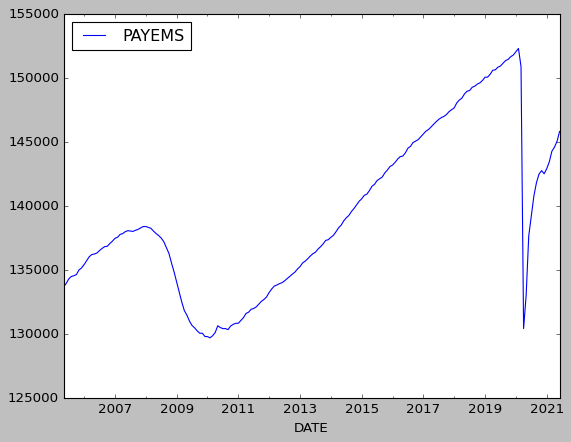

In [ ]:
df.plot() #plot the data then can right click the image-Copy and Paste into your doc

How about job losses? On https://fred.stlouisfed.org/categories search for 'job losses on layoff' yields LNS13023653 and 'Permanent Job Losers' is LNS13026638, so:

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['LNS13023653', 'LNS13026638'],
                    'fred', start, end)
df=df.rename(columns={"LNS13023653": "job losses on layoff", "LNS13026638": "perm job losses"})

<Axes: xlabel='DATE'>

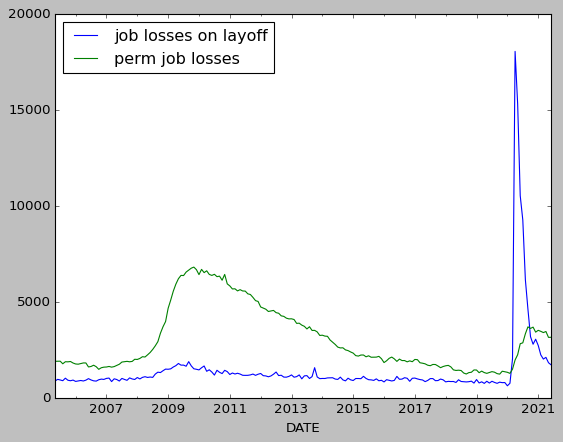

In [ ]:
df.plot()

What about a cross-section, say unemployment rate across NJ counties? Search for 'Unemployment Rate Atlantic County NJ' gets NJATLA2URN, and ''Unemployment Rate Atlantic County NJ' gets
NJCUMB2URN, so:


In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN'],
                    'fred', start, end)
df=df.rename(columns={"NJATLA2URN": "unemp atl", "NJCUMB2URN": "unemp cum"})

<Axes: xlabel='DATE'>

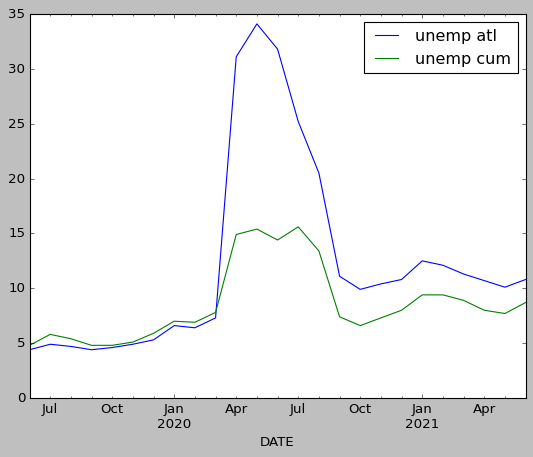

In [ ]:
df.plot()

Wow Atl got hit hard! Must be casinos, hotels, and dining! How about let's compare all of SJ at one point in time! So add few other counties:

NJATLA2URN atl

NJCUMB2URN cumberland

NJSALE5URN salem

NJGLOU5URN gloucester

NJCAMD7URN camden

NJBURL0URN burlington

NJCAPE1URN cape may

NJOCEA5URN ocean

And lets do pre-pandemic and after pandemic

In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2019, 6, 1)

dfPre = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPre=dfPre.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

#below is the same just 2020, and called "Post"
start = datetime.datetime (2020, 6, 1)
end = datetime.datetime (2020, 6, 1)

dfPost = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPost=dfPost.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

In [ ]:
dfPre

atl  cum  sal  glo  cam  bur  cap may  ocean
DATE                                                    
2019-06-01  4.4  4.8  4.4  3.4  3.8  3.0      4.2    3.2

[Text(0.5, 0, 'june 2019'), Text(0, 0.5, 'unemployment percent')]

[]

[Text(0.5, 0, 'june 2020'), Text(0, 0.5, 'unemployment percent')]

[]

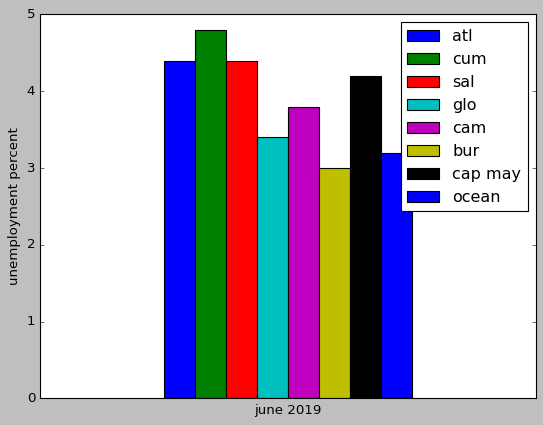

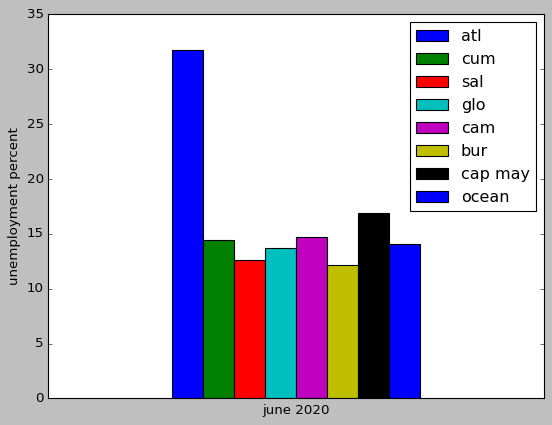

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

Interesting! Looks like there were similar and then atl shot up; but remember about scaling of y axis!, if you make both same scale:


[Text(0.5, 0, 'june 2019'), Text(0, 0.5, 'unemployment percent')]

[]

(0.0, 35.0)

[Text(0.5, 0, 'june 2020'), Text(0, 0.5, 'unemployment percent')]

[]

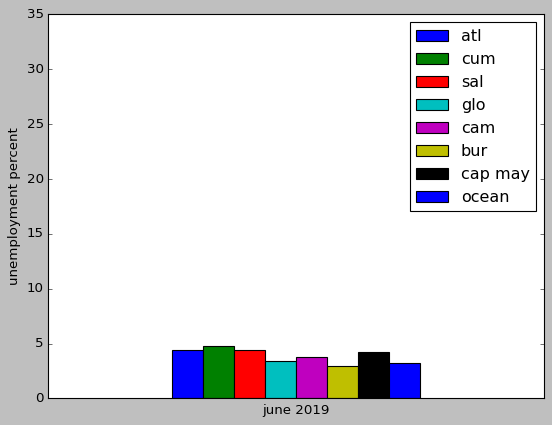

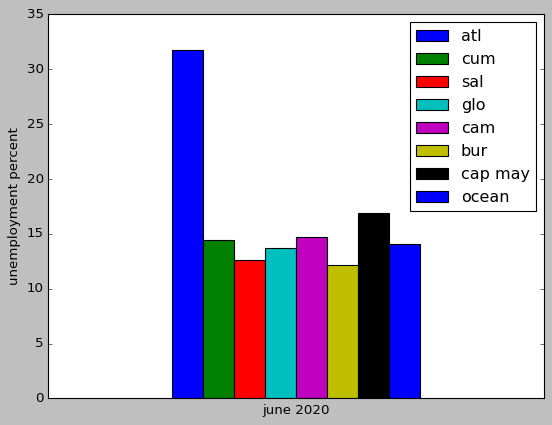

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])
ax.set_ylim(0,35)

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

#### World Bank
can actually search from within Py :)

In [ ]:
pdr.wb.search('gdp.*capita.*const')

id  \
691      6.0.GDPpc_constant   
11165        NY.GDP.PCAP.KD   
11167        NY.GDP.PCAP.KN   
11169     NY.GDP.PCAP.PP.KD   
11170  NY.GDP.PCAP.PP.KD.87   

                                                    name unit  \
691    GDP per capita, PPP (constant 2011 internation...        
11165                 GDP per capita (constant 2015 US$)        
11167                      GDP per capita (constant LCU)        
11169  GDP per capita, PPP (constant 2021 internation...        
11170  GDP per capita, PPP (constant 1987 internation...        

                             source  \
691                  LAC Equity Lab   
11165  World Development Indicators   
11167  World Development Indicators   
11169  World Development Indicators   
11170         WDI Database Archives   

                                              sourceNote  \
691    GDP per capita based on purchasing power parit...   
11165  GDP per capita is gross domestic product divid...   
11167  GDP per capita is gross domestic product divid...   
11169  GDP per capita based on purchasing power parit...   
11170                                                      

                                      sourceOrganization            topics  
691         b'World Development Indicators (World Bank)'  Economy & Growth  
11165  b'World Bank national accounts data, and OECD ...  Economy & Growth  
11167  b'World Bank national accounts data, and OECD ...  Economy & Growth  
11169  b'International Comparison Program, World Bank...  Economy & Growth  
11170                                                b''

In [ ]:
dat = pdr.wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2015).stack().unstack(0)

<ipython-input-34-d4dde3af674c>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  dat = pdr.wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2015).stack().unstack(0)


In [ ]:
datNoInd=dat
datNoInd.index=dat.index.droplevel(-1)
datNoInd

country        Canada        Mexico  United States
year                                              
2005     41006.222932   9491.517302   52649.571305
2006     41663.512305   9813.828042   53596.315237
2007     42106.872427   9877.695326   54152.829265
2008     42067.568700   9826.342184   53703.962896
2009     40376.415368   9074.118815   51863.618341
2010     41164.339906   9389.067221   52821.404764
2011     42043.641961   9575.934378   53259.255214
2012     42320.643128   9782.517763   54080.228650
2013     42851.170533   9738.710598   54844.242580
2014     43643.235647   9862.481254   55817.563247
2015     43594.194105  10021.238612   57040.208214

Text(0.5, 0, 'year')

Text(0, 0.5, 'PCGDP,constant 2010 USD')

Text(0.5, 1.0, 'my title')

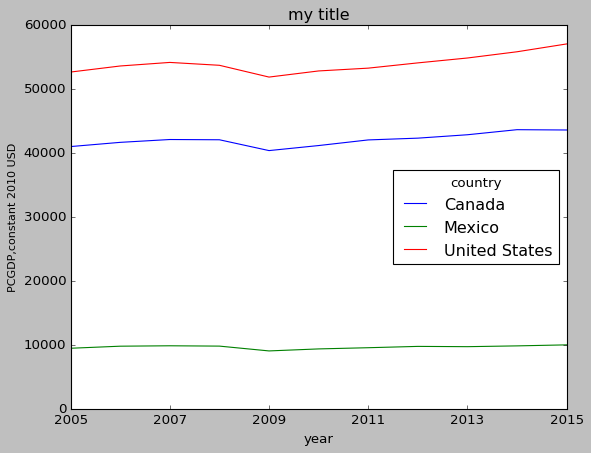

In [ ]:
ax=datNoInd.plot()
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('PCGDP,constant 2010 USD', fontsize=10)
ax.set_title('my title')

Now imagine you want to compare GDP to the Unemployment rate.

In [ ]:
pdr.wb.search('unemp.*').iloc[:,:2]

id  \
922              9.0.Unemp.All   
923              9.0.Unemp.B40   
924              9.0.Unemp.T60   
940              9.1.Unemp.All   
941              9.1.Unemp.B40   
...                        ...   
22265  per_lm_alllm.cov_q1_tot   
22269  per_lm_alllm.cov_q2_tot   
22273  per_lm_alllm.cov_q3_tot   
22277  per_lm_alllm.cov_q4_tot   
22281  per_lm_alllm.cov_q5_tot   

                                                    name  
922                                       Unemployed (%)  
923                     Unemployed-Bottom 40 Percent (%)  
924                        Unemployed-Top 60 Percent (%)  
940                                 Unemployed (%), Male  
941               Unemployed-Bottom 40 Percent (%), Male  
...                                                  ...  
22265  Coverage of unemployment benefits and ALMP in ...  
22269  Coverage of unemployment benefits and ALMP in ...  
22273  Coverage of unemployment benefits and ALMP in ...  
22277  Coverage of unemployment benefits and ALMP in ...  
22281  Coverage of unemployment benefits and ALMP in ...  

[73 rows x 2 columns]

In [ ]:
dat = pdr.wb.download(indicator=['NY.GDP.PCAP.KD','SL.UEM.TOTL.NE.ZS'], country=['US', 'CA', 'MX'], start=2015, end=2020)

<ipython-input-38-7a94415b58b4>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  dat = pdr.wb.download(indicator=['NY.GDP.PCAP.KD','SL.UEM.TOTL.NE.ZS'], country=['US', 'CA', 'MX'], start=2015, end=2020)


In [ ]:
#dat
#lets sort it by year within each country
dat=dat.sort_values(['country', 'year'], ascending=[True, True])
dat

NY.GDP.PCAP.KD  SL.UEM.TOTL.NE.ZS
country       year                                   
Canada        2015    43594.194105              6.945
              2016    43551.342602              7.038
              2017    44339.388669              6.426
              2018    44907.343684              5.837
              2019    45100.291490              5.690
              2020    42366.128519              9.657
Mexico        2015    10021.238612              4.311
              2016    10100.502121              3.853
              2017    10193.772719              3.419
              2018    10296.869094              3.275
              2019    10159.444836              3.477
              2020     9234.643625              4.441
United States 2015    57040.208214              5.280
              2016    57658.670883              4.869
              2017    58703.144078              4.355
              2018    60127.210276              3.896
              2019    61400.548154              3.669
              2020    59493.145982              8.055

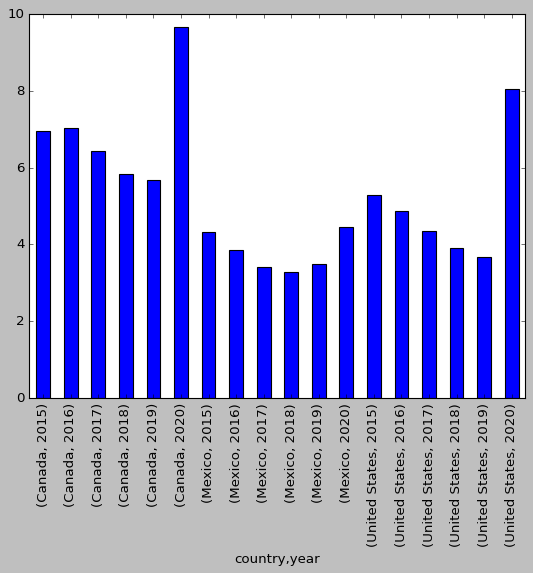

In [ ]:
ax=dat['SL.UEM.TOTL.NE.ZS'].plot(kind="bar")

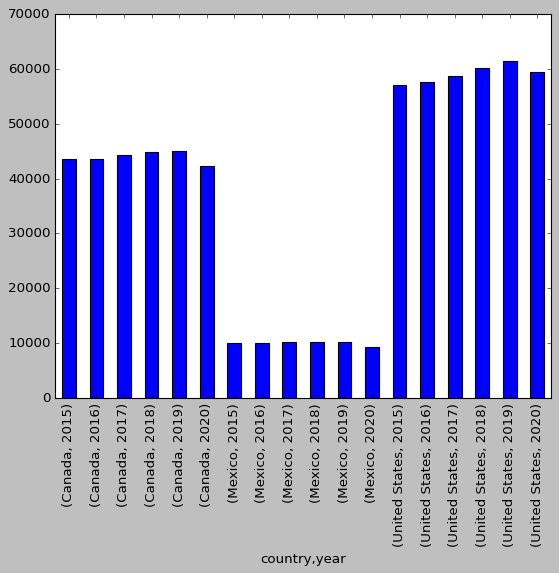

In [ ]:
ax=dat['NY.GDP.PCAP.KD'].plot(kind="bar")

# VIS ----------------------------------------

this is the core of the class; we'll spend the rest of it on vis

we'll mostly base it on galleries as listed in syllabus:

https://theaok.github.io/vis/#galleries

<br>
we first cover vis tables, then setup/custimozation/tailoring with matplotlib and then main part of the course: examples/galleries by theme/approach

## [feb20] vis tables
before getting into actual graphs we start by coloring tables :)
(and can export to xls, tex, html)

REF:
https://pandas.pydata.org/docs/user_guide/style.html#

In [3]:
urllib.request.urlretrieve("https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download", "auto.dta")
auto=pd.read_stata('auto.dta')

('auto.dta', <http.client.HTTPMessage at 0x791f9dbba090>)

In [ ]:
auto[:10].style.background_gradient(cmap='Greens').format(precision=2) #RdYlGn #https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
auto[:5].style.text_gradient(cmap='Blues').format(precision=2) #maybe better more delicate

In [ ]:
auto[:10].style.bar(subset=['mpg', 'price'], color='#d65f5f').format(precision=2) #bar chart
# per html col visualizer (and rgb equivalents) eg htmlcolorcodes.com

In [ ]:
#and can export it to_html() and download onto hard drive
html = auto.style.background_gradient(cmap="hot").to_html() #Reds Greens
f = open('auto.html','w'); f.write(html); f.close() #can have multiple commands in one line with ';'
files.download('auto.html') #your os will probably prompt you to open in webbrowser, do it

###to excel (i'd just stick with html) https://betterdatascience.com/style-pandas-dataframes/
#auto.style.background_gradient(cmap="hot").to_excel("table.xlsx"); files.download('table.xlsx')

94777

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#can color any table output, say corr matrix
auto.select_dtypes(include=['int16']).corr().style.background_gradient(cmap='RdYlGn').format(precision=2)

<Axes: >

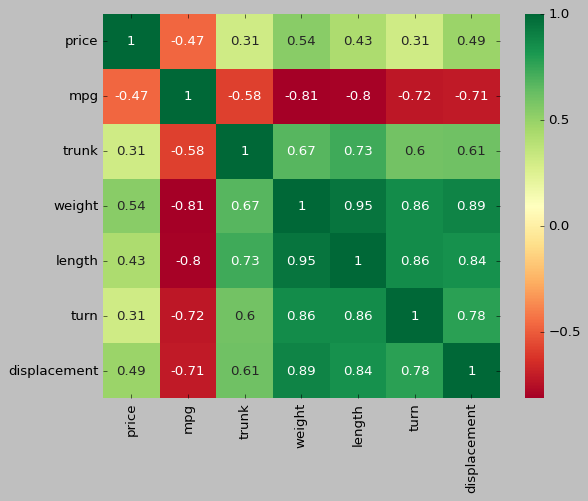

In [ ]:
sns.heatmap(auto.select_dtypes(include=['int16']).corr().round(2),cmap="RdYlGn",annot=True) # RdYlGn love the colors!

## basics / setup:  mpl

mpl (matplotlib) is Py main vis library, and other libraries (eg pandas, seaborn) run on the top of it; mpl gives you max power and customization

graphing is easy in Py, but often want that extra  customization and tailor all the parts--we'll start with a look under the hood to have an awesome flexibility with mpl

having covered setup/customization/tailoring with mpl we move to main examples by theme in next sections


MAIN REF:
https://matplotlib.org/stable/gallery/index.html


REFS:

neat and useful
https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html

dry and not so useful
https://wesmckinney.com/book/plotting-and-visualization.html

great for fine tuning/customization
https://nbviewer.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

another one:
https://aeturrell.github.io/coding-for-economists/vis-matplotlib.html

<br><br>

cheatsheets/handouts:

https://matplotlib.org/cheatsheets/

https://www.datacamp.com/cheat-sheet/matplotlib-cheat-sheet-plotting-in-python


<br>
sidenote on  pandas graphs:
<font size="1">
since we started the class with pandas for data management, we could also use pandas for vis, syntax is easy/user-friendly; BUT since pandas just runs on the top of matplotlib and  deeper customization is done in matplotlib, we will just stick with matplotlib as much as possible!
pandas has one main plot function that can produce all sorts of plots: http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
and see pandas galleries https://theaok.github.io/vis/#galleries
</font>

In [ ]:
#!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download
#auto=pd.read_stata('auto.dta'); auto.head(2)
auto=pd.read_stata('https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download')

In [ ]:
#the first thing to pay attention to is magics and themes/styles--see the 1st code cell

In [ ]:
#remember we did: import matplotlib.pyplot as plt
#and so the fastest/easiest is to do
#plt.PLOTTYPE(VARS) eg:
#plt.hist(auto.mpg)
#plt.scatter(auto.price,auto.weight)
#plt.barh(auto.make,auto.mpg)

#sure do use that, simplicity is the king, but only for playing/quick vis
#proper vis you want to tailor/customize
#and final vis you want to organize, label, and polish
#for all of that use the classic setup in next cell

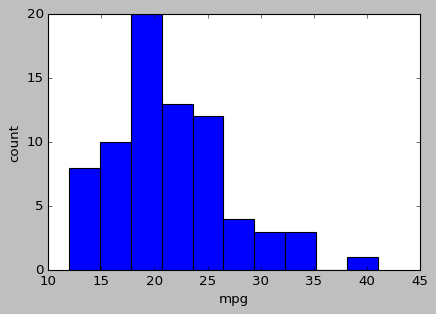

In [ ]:
#main options/customizations (more later in advanced matplotlib)
#detailed ref per customization: https://nbviewer.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

#oneliner quick setup:
fig, ax = plt.subplots(figsize = (6,4)) #fig=overall environemnt; ax(s)=actual plot(s)

#ax.set_title('my title')
ax.set_xlabel("mpg")  #remember always all axes must be labelled
ax.set_ylabel("count")
#put some plot in it, eg:
ax.hist(auto.mpg); #,alpha=.5,bins=20,color='blue'
#ax.scatter(auto.price,auto.weight, c='black', s=30, alpha=0.3)
#ax.legend(["blah"],loc=0) #0 soft decides; 1-4 corners; more options
#ax.set_ylim([0,50])
#ax.set_xlim([0,50])
#ax.set_xticks([10, 20, 50])
#ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$'], fontsize=18)
#plt.gcf().canvas.get_supported_filetypes() #list supported output/save formats
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as
#plt.show() #may need it depends on os/interface/browser #semilcolon supreses intermediary output

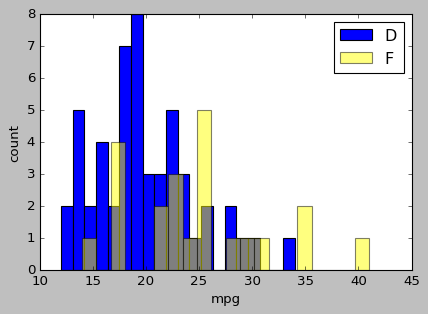

In [ ]:
#overlays; super simple: just keep on adding plots
fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel("mpg")
ax.set_ylabel("count")
#plot1
ax.hist(auto.mpg[auto.foreign=="Domestic"],label="D", alpha=1,bins=20,color='blue')
#plot2
ax.hist(auto.mpg[auto.foreign=="Foreign"] ,label="F", alpha=.5,bins=20,color='yellow')
ax.legend();

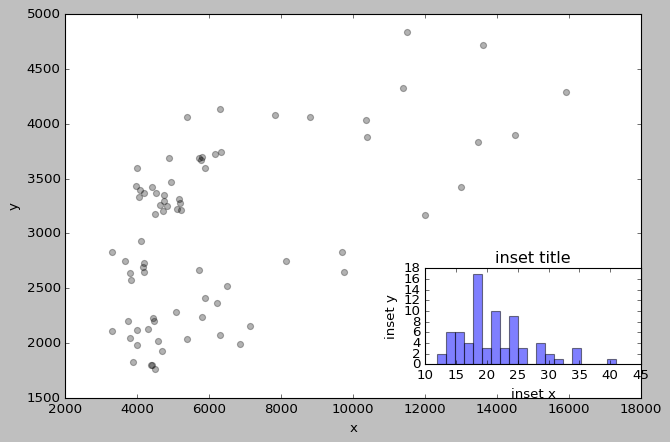

In [ ]:
#inset figure love it! looks like nature or science
# instead of oneliner setup, step by step:
fig = plt.figure(figsize=(9,6)) #plots in matplotlib reside within a Figure object
# add axes: left, bottom, width, height (range 0 to 1) #ax = plt.axes() #make axes
#[a,b,c,d] (a,b): point in southwest corner of the rectangle; c=width; d= height
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax2 = fig.add_axes([0.6, 0.17, 0.3, 0.2]) # inset axes
# main figure
ax1.scatter(auto.price,auto.weight, c='black', s=30, alpha=0.3)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
# inset
ax2.hist(auto.mpg,alpha=.5,bins=20,color='blue')
ax2.set_xlabel('inset x')
ax2.set_ylabel('inset y')
ax2.set_title('inset title');

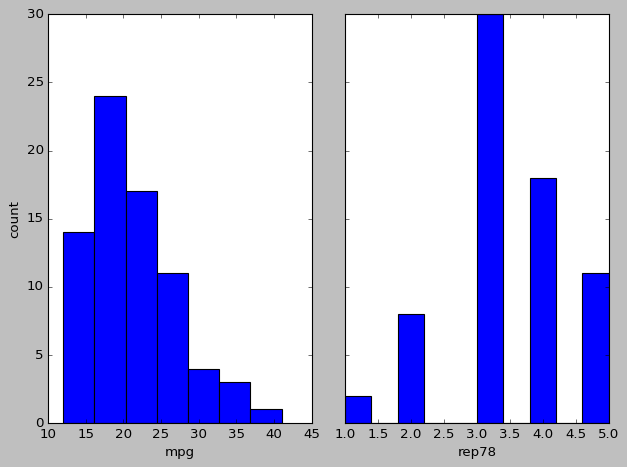

In [ ]:
#subplots
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True) #1row2col
axs[0].hist(auto.mpg, bins=7) #edgecolor="black" ,color="green" histtype=u'step' alpha=.5
#btw can do categorical var hist too: auto.rep78.value_counts() #same as bar chart
axs[1].hist(auto.rep78)
axs[0].set_ylabel('count')
axs[0].set_xlabel('mpg')
axs[1].set_xlabel('rep78');

##alt
#fig = plt.figure()
#plt.subplots_adjust(hspace=0.2) #adjust horiz space between graphs
#ax1 = plt.subplot(211, title='foreign') #2x1grid 1st graph
#plt.scatter(auto[auto.foreign=='Foreign'].weight, auto[auto.foreign=='Foreign'].length)
#ax2 = plt.subplot(212, sharex=ax1, sharey=ax1, title='doemstic') #2x1grid 2nd graph
#plt.scatter(auto[auto.foreign=='Domestic'].weight, auto[auto.foreign=='Domestic'].length)
#xticklabels = ax1.get_xticklabels() #+ ax2.get_xticklabels() #drop labelling of 1st x axis
#plt.setp(xticklabels, visible=False)

### subplots with a loop (facet/trellis)
often want to crank out a bunch on the fly (not one by one, by hand)

(a sidenote: subplots in pandas
https://www.statology.org/pandas-groupby-plot/)

In [ ]:
#say we want to make subplots for each level of rep78
auto.rep78.value_counts()
g = auto.groupby('rep78') #first we subset data into n groups
print ('\n hi adam, so we have', g.ngroups, 'groups')

rep78
3.0    30
4.0    18
5.0    11
2.0     8
1.0     2
Name: count, dtype: int64


 hi adam, so we have 5 groups


In [ ]:
#a for loop; note: you must indent!
#above we generated object g with n groups of dataframes--lets have a look--we can pull them out with a loop
for v,d in g: #for each group there are 2 elements:
  print(v) #v is just a level/value of the subset var
  d.head(2) #d is the actual subset dataframe for the corresponding level of the subset var

1.0


make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
39   Olds Starfire   4195   24    1.0       2.0     10    2730     180    40   
47  Pont. Firebird   4934   18    1.0       1.5      7    3470     198    42   

    displacement  gear_ratio   foreign  
39           151        2.73  Domestic  
47           231        3.08  Domestic

2.0


make  price  mpg  rep78  headroom  trunk  weight  length  \
11      Cad. Eldorado  14500   14    2.0       3.5     16    3900     204   
16  Chev. Monte Carlo   5104   22    2.0       2.0     16    3220     200   

    turn  displacement  gear_ratio   foreign  
11    43           350        2.19  Domestic  
16    41           200        2.73  Domestic

3.0


make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
0  AMC Concord   4099   22    3.0       2.5     11    2930     186    40   
1    AMC Pacer   4749   17    3.0       3.0     11    3350     173    40   

   displacement  gear_ratio   foreign  
0           121        3.58  Domestic  
1           258        2.53  Domestic

4.0


make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
4   Buick Electra   7827   15    4.0       4.0     20    4080     222    43   
14   Chev. Impala   5705   16    4.0       4.0     20    3690     212    43   

    displacement  gear_ratio   foreign  
4            350        2.41  Domestic  
14           250        2.56  Domestic

5.0


make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
19   Dodge Colt   3984   30    5.0       2.0      8    2120     163    35   
42  Plym. Champ   4425   34    5.0       2.5     11    1800     157    37   

    displacement  gear_ratio   foreign  
19            98        3.54  Domestic  
42            86        2.97  Domestic

In [ ]:
for i, (v, d) in enumerate(g): #enumerate would produce a counter i=0,1,...,n
  print(i,v) #print counter and values of the grouping variable; we dont pull the actual dataframes (d)

0 1.0
1 2.0
2 3.0
3 4.0
4 5.0


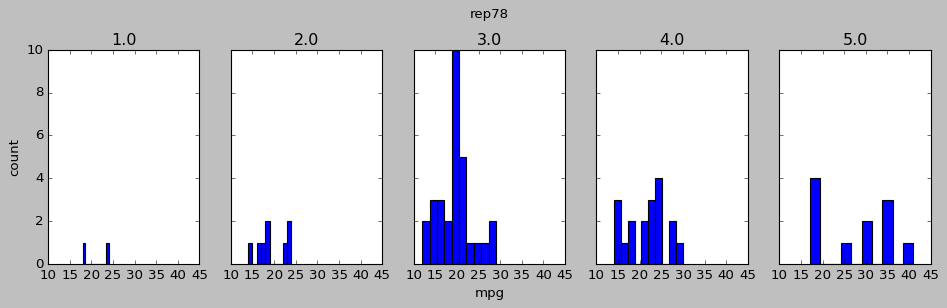

In [ ]:
#start figure with a usual oneliner, just use g.ngroups (5) for number of columns
fig, axs = plt.subplots(1,g.ngroups, sharex=True, sharey=True, tight_layout=True, figsize=(12, 4)) #1row n cols
for i, (v, d) in enumerate(g): #and then use the for loop to make n subplots
  axs[i].hist(d['mpg']) #on each iteration an axs will be generated: 1,2,...,n; and subset dataframe d will be used
  axs[i].set_title(v) #title each subplot with a level of the grouping var
axs[0].set_ylabel('count') #no indentation, so run it only once--the loop ended line above (last line indented)
axs[2].set_xlabel('mpg')
axs[2].text(23, 11.5, r'rep78', fontsize=12); #a handy way to stick text exactly where you want

## distribution / histograms                         
when you have one var and want to show its distribution/spread; or many vars (subgroups of a var): bunch of graphs, one for each var (subgroup)<br>

mostly hist v boxplot: hist more info, but boxplot cleaner esp for comparisons<br>

note: varieties of graphs here just to practice different setups, especially subplots; in your work be parsimonious! and be interesting: ask the so what question!


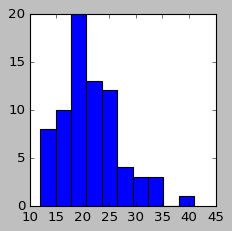

In [ ]:
fig, ax = plt.subplots(figsize = (3, 3)); ax.hist(auto.mpg);
#bins=7 edgecolor="black" color="green" color="#69b3a2" histtype=u'step' alpha=.5
###pandas: auto[['price']].plot(kind='hist', bins=5)

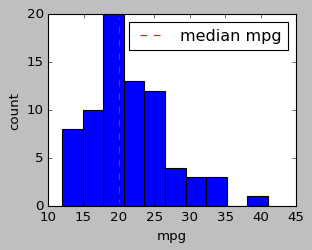

In [ ]:
# in general very useful to additionally mark interesting stuff in a graph (more on this later)
fig, ax = plt.subplots(figsize = (4, 3))
ax.hist(auto.mpg)
medMpg=auto.mpg.median()
ax.axvline(medMpg, color="red", ls="--", label="median mpg") # or say med mpg in 1990, in ENG, etc
ax.set_xlabel('mpg')
ax.set_ylabel('count')
ax.legend();

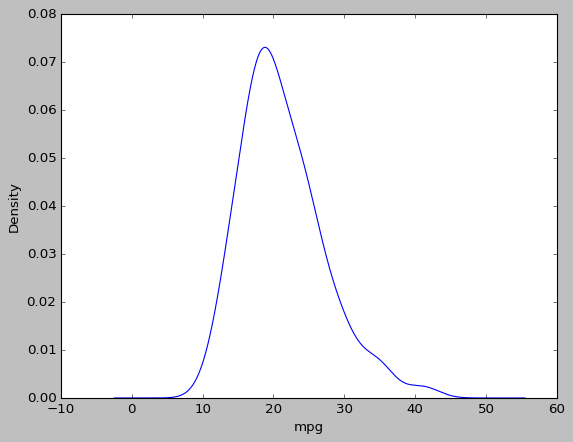

In [ ]:
#density/kde plot #pandas
fig, ax = plt.subplots();auto.mpg.plot.kde(bw_method=0.4,ax=ax);ax.set_xlabel('mpg'); #small bandwidth may overfit "wiggly line"; big may underfit

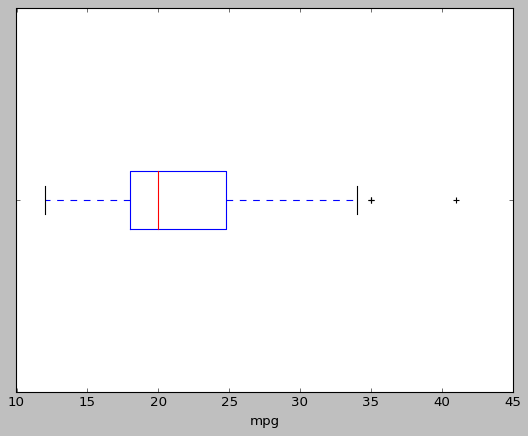

In [ ]:
#boxplot
fig, ax = plt.subplots(); ax.boxplot(auto.mpg,vert=False); ax.set_yticklabels('');ax.set_xlabel('mpg');

In [ ]:
#boxplot helps id ouliers easily: pts outside of whisker caps: lets list them
auto[auto.mpg>34]

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
56  Datsun 210   4589   35    5.0       2.0      8    2020     165    32   
65      Subaru   3798   35    5.0       2.5     11    2050     164    36   
70   VW Diesel   5397   41    5.0       3.0     15    2040     155    35   

    displacement  gear_ratio  foreign  
56            85        3.70  Foreign  
65            97        3.81  Foreign  
70            90        3.78  Foreign

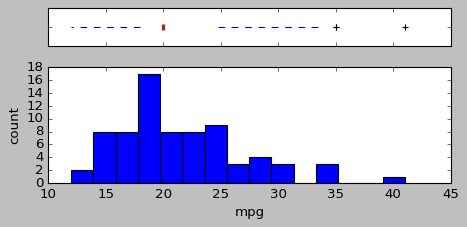

In [ ]:
#boxplot v histogram side-by-side comparison: similar info and cleaner (but less info)

fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True, figsize = (6, 3),
    gridspec_kw={'height_ratios': [1, 3]}) #2row1col 1:3 height ratio #note indentation bc it continues from line before
axs[0].boxplot(auto.mpg, vert=False, medianprops=dict(linewidth=3,color='firebrick'),
     showbox=False, showcaps=False) #tufte style
axs[0].set_yticklabels('')
axs[1].hist(auto.mpg, bins=15) #edgecolor="black" ,color="green" histtype=u'step' alpha=.5
axs[1].set_xlabel('mpg')
axs[1].set_ylabel('count');
#boxplot customization: https://matplotlib.org/stable/gallery/statistics/bxp.html

#side-by-side comparison with 1row3col subplots
#fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True, figsize = (4, 5),
#    gridspec_kw={'width_ratios': [1,1,3]})
#axs[0].boxplot(auto.mpg)
#axs[1].boxplot(auto.mpg,showbox=False, showcaps=False)
#axs[2].hist(auto.mpg, bins=20,orientation='horizontal',alpha=.2)
#axs[0].set_ylabel('mpg')
#axs[0].set_xlabel('default')
#axs[1].set_xlabel('tufte style')
#axs[2].set_xlabel('count')
#axs[0].set_xticklabels('')
#axs[1].set_xticklabels('')
#plt.savefig('fig.pdf'); files.download('fig.pdf'); #love the graph, gotta save it

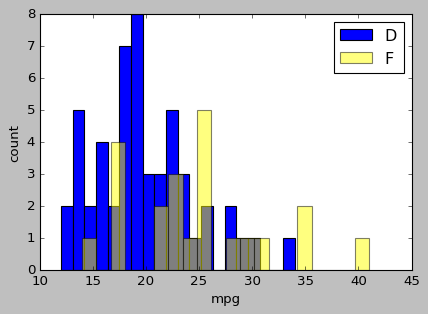

In [ ]:
#hist: one var by levels of another var
fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel("mpg")
ax.set_ylabel("count")
ax.hist(auto.mpg[auto.foreign=="Domestic"],label="D", alpha=1,bins=20,color='blue')
ax.hist(auto.mpg[auto.foreign=="Foreign"] ,label="F", alpha=.5,bins=20,color='yellow')
ax.legend();
###pandas:
#auto['mpg'].groupby(auto['foreign']).hist(alpha=.6,legend=True);
#auto.groupby(by=auto.foreign)['mpg'] #alt groupby meth

#multiple vars in 1 (usually not super useful)
#fig, ax = plt.subplots(figsize = (3, 3))
#ax.hist(auto.headroom)
#ax.hist(auto.rep78,alpha=.7)
#ax.set_ylabel('count')
#ax.legend(('headroom', 'rep78'), loc='upper left');

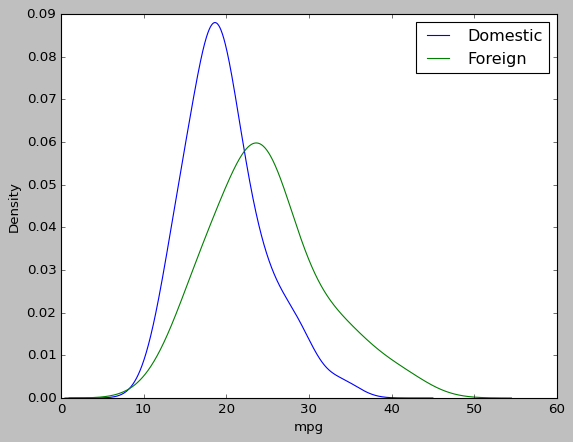

In [ ]:
#density/kde: one var by levels of another one; hist way more info! #pandas
fig, ax = plt.subplots();auto.groupby(auto.foreign)['mpg'].plot(kind='density', legend=True,ax=ax);ax.set_xlabel('mpg');

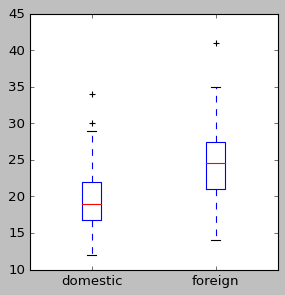

In [ ]:
#boxplot: one var by levels of another var; boxplot maybe better (cleaner!) for comparisons than hist
#insight: of course foreign have better mean mpg (and max (>35))
#(and middle 50% of each distribution pretty much non-overlapping)
fig1, ax1 = plt.subplots(figsize = (4, 4))
ax1.boxplot(auto.mpg[auto.foreign=="Domestic"], positions=[1]) #only one subplot; but with 2 positions
ax1.boxplot(auto.mpg[auto.foreign=="Foreign"],  positions=[2])
plt.xticks([1, 2], ['domestic', 'foreign']);
#TODO label y axis

#or split with groupby like this:
#g=auto[['mpg','foreign']].groupby('foreign')
#plt.boxplot([g.get_group('Domestic')['mpg'],g.get_group('Foreign')['mpg']]);

#matplotlib v pandas and seaborn--easy to subset on categories there
#fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True,
#    gridspec_kw={'width_ratios': [1,1,1]}) #note indentation bc it continues from line before
#axs[0].boxplot(auto.mpg[auto.foreign=="Domestic"], positions=[1]) #just cp from above
#axs[0].boxplot(auto.mpg[auto.foreign=="Foreign"], positions=[2])
#auto.boxplot(column='mpg',by='foreign',ax=axs[1]) #adding subplots with ax= #pandas
#sns.boxplot(x='foreign', y='mpg', data=auto,ax=axs[2]) #here too #seaborn
#axs[0].set_ylabel('mpg')
#axs[2].set_ylabel('')
#axs[1].set_xlabel('pandas')
#axs[2].set_xlabel('seaborn')
#axs[1].set_title('')
#fig.suptitle('');

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe1f377b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe1f385390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe1f55dd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe1f386bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe1f3876d0>],
 'means': []}

Text(0.5, 1.0, '1.0')

[Text(1, 0, '')]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe1f393250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe1f39c590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe1f392050>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe1f39d690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe1f39dfd0>],
 'means': []}

Text(0.5, 1.0, '2.0')

[Text(1, 0, '')]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe1f39fcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe1f3a8f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe1f39f610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe1f3aa310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe1f3aac10>],
 'means': []}

Text(0.5, 1.0, '3.0')

[Text(1, 0, '')]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe1f3a4f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe1f3a6210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe1f3a4690>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe1f3a7510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe1f3a7e90>],
 'means': []}

Text(0.5, 1.0, '4.0')

[Text(1, 0, '')]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe1f3a69d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe1f3c6190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe1f3c4a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe1f3c7390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe1f3c7c90>],
 'means': []}

Text(0.5, 1.0, '5.0')

[Text(1, 0, '')]

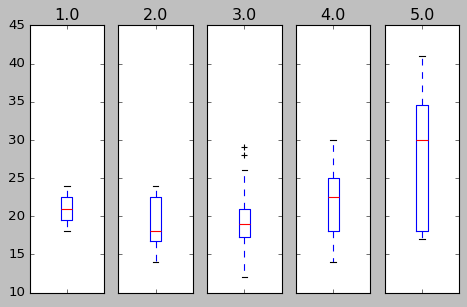

In [ ]:
#subset by many categories, automate with a loop
g = auto.groupby('rep78')
fig, axs = plt.subplots(1,g.ngroups, sharey=True, tight_layout=True, figsize=(6, 4))
for i, (grp, d) in enumerate(g):
  axs[i].boxplot(d['mpg'])
  axs[i].set_title(grp)
  axs[i].set_xticklabels('')
#TODO label y axis and titles just as in basics / setup with mpl
###pandas: auto.boxplot(column='mpg',by='rep78',vert=False), plt.show()

In [ ]:
#violinplots https://www.scaler.com/topics/matplotlib/violin-plot-matplotlib/
# cool examples: https://stackabuse.com/matplotlib-violin-plot-tutorial-and-examples/
#fig, axs = plt.subplots(1, 2, figsize = (3, 3), sharey=True, tight_layout=True,
#    gridspec_kw={'width_ratios': [1,2]})
#axs[0].violinplot(auto.mpg)
#axs[0].set_ylabel('mpg')
#axs[1].violinplot(auto.mpg[auto.foreign=="Domestic"], positions=[1])
#axs[1].violinplot(auto.mpg[auto.foreign=="Foreign"], positions=[2])
#plt.xticks([1, 2], ['domestic', 'foreign']);

# and then there's ridgline, but the code is like sending a rocket to the outer space
# https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/

 in general, always good to know distribution of your key vars,  so once you load the data,
 one of the first things to do is to subset data to key vars [rule of simplicity/cleanliness], and get histograms for all of them--traditionally you'd get basic sum stats like mean median mode std dev and range--but with hist you get all of that and more in a vis that's easier and faster to comprehend :)

(array([28., 21.,  9.,  3.,  1.,  4.,  3.,  1.,  3.,  1.]),
 array([ 3291. ,  4552.5,  5814. ,  7075.5,  8337. ,  9598.5, 10860. ,
        12121.5, 13383. , 14644.5, 15906. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'price')

(array([ 8., 10., 20., 13., 12.,  4.,  3.,  3.,  0.,  1.]),
 array([12. , 14.9, 17.8, 20.7, 23.6, 26.5, 29.4, 32.3, 35.2, 38.1, 41. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'mpg')

(array([10., 11.,  7.,  7.,  8., 13.,  9.,  5.,  2.,  2.]),
 array([1760., 2068., 2376., 2684., 2992., 3300., 3608., 3916., 4224.,
        4532., 4840.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'weight')

(array([ 3.,  5.,  9., 11.,  7.,  6., 16.,  7.,  8.,  2.]),
 array([142. , 151.1, 160.2, 169.3, 178.4, 187.5, 196.6, 205.7, 214.8,
        223.9, 233. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'length')

(array([ 2.,  0.,  8.,  0.,  0., 30.,  0., 18.,  0., 11.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'rep78')

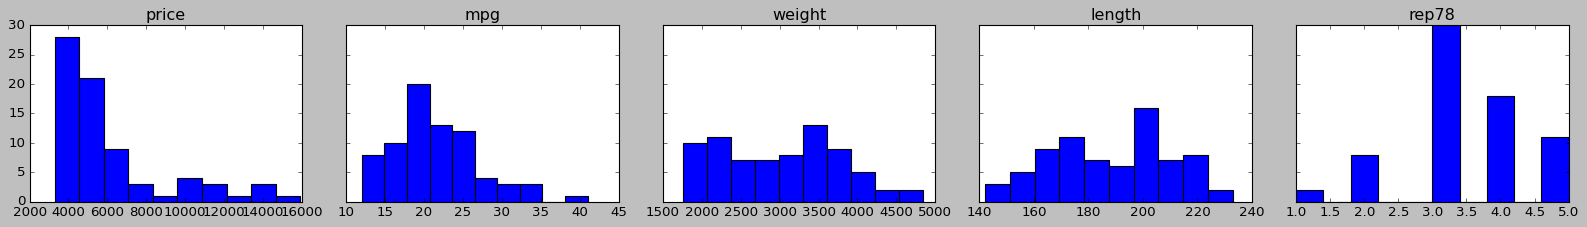

In [ ]:
aut=auto[['price','mpg','weight','length','rep78']] #subset to key vars
fig, ax = plt.subplots(1,5,sharey=True,tight_layout=True ,figsize = (20, 3))
for i,d in enumerate(aut):
  ax[i].hist(aut[d])
  ax[i].set_title(d)
###alternative setup:
#aut.hist(sharey=True,figsize=(30,3),layout=(1,5)); #note different setup from earlier
#put options into graph as opposed to earlier upfront; fligured them out with autocomplete feature:
#just put cursor into aut.hist() and it gives you options

# <font color='red'>>>>will be updated from here on>>></font>

$>>>$ TODO pick up editing here

## [feb27] ranking / bar charts
some of the most useful and most underutilized vis--use them a lot

more versatility here than with distributions that are only about one var (unless multiple distributions and/or by groups)

simplest bar chart is 2 vars list of values, but do calc sum stats such as mean and subset by other vars!

with bar charts can show a ton of relationships between multiple vars, again: not only raw values for a var, but also sum stats: mean, median, std, etc


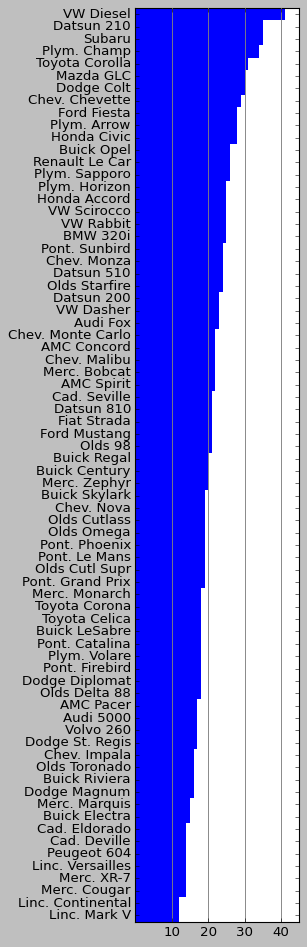

In [4]:
#bar chart is a great replacement for a list, even say upto 100 elements; always sort
#fig, ax = plt.subplots(figsize = (3, 3)); ax.bar(auto.foreign,auto.mpg);
auto = auto.sort_values('mpg') #usually useful to sort on var of interest
fig, ax = plt.subplots(tight_layout=True, figsize=(4,12))
ax.barh(auto.make,auto.mpg, height = 1, alpha=1, edgecolor='none')
ax.set_xticks([10, 20, 30, 40]) #be clean/parsimonious
ax.grid(axis='x' , color ='grey', linestyle ='-', linewidth = 0.9,alpha = 0.9);

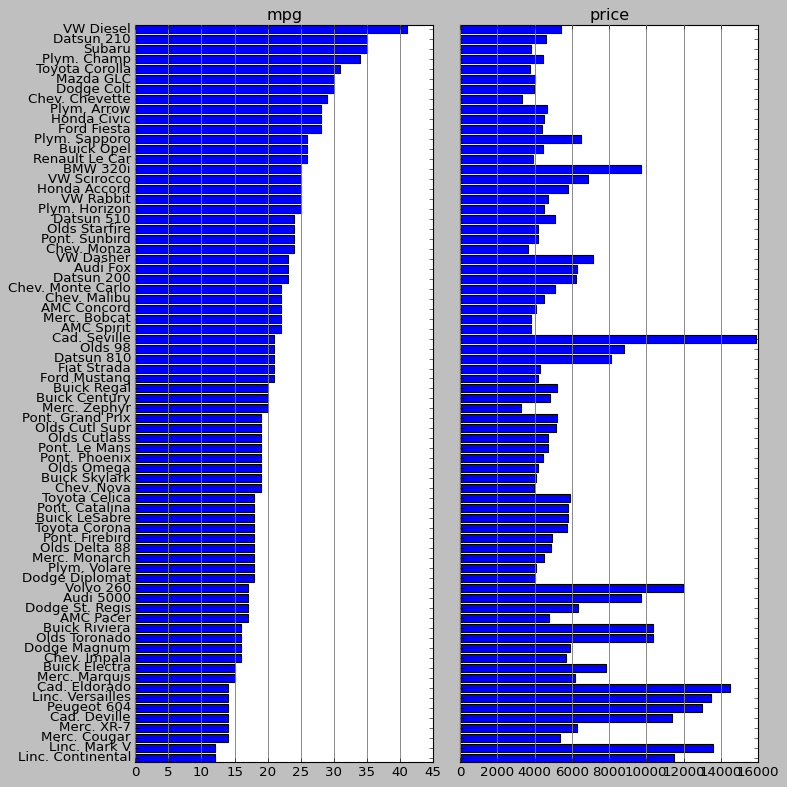

In [5]:
auto=auto.sort_values(['mpg', 'price'], ascending=[True, True])
fig, axs = plt.subplots(1, 2, figsize = (10, 10), sharey=True, tight_layout=True,
    gridspec_kw={'width_ratios': [1,1]})
axs[0].barh(auto.make,auto.mpg)
axs[0].set_title('mpg')
axs[1].barh(auto.make,auto.price)
axs[1].set_title('price')
axs[0].grid(axis='x' , color ='grey', linestyle ='-', linewidth = 0.9,alpha = 0.9)
axs[1].grid(axis='x' , color ='grey', linestyle ='-', linewidth = 0.9,alpha = 0.9);
#axs[0].grid(axis='y' , color ='grey', linestyle ='-', linewidth = 8,alpha = 0.3);

In [8]:
auto[['rep78','foreign']]

rep78   foreign
25    3.0  Domestic
26    3.0  Domestic
29    4.0  Domestic
32    4.0  Domestic
10    3.0  Domestic
..    ...       ...
67    5.0   Foreign
42    5.0  Domestic
65    5.0   Foreign
56    5.0   Foreign
70    5.0   Foreign

[74 rows x 2 columns]

In [29]:
auto.mpg[auto.rep78==1].mean()
auto.mpg[auto.rep78==2].mean()
auto.mpg[auto.rep78==5].mean()

21.0

19.125

27.363636363636363

<BarContainer object of 5 artists>

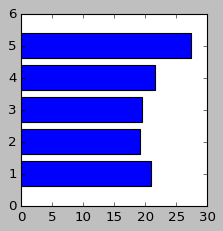

In [23]:
#useful to calc sum stats such as mean or count
mpg_rep78=pd.DataFrame(auto['mpg'].groupby(auto['rep78']).agg('mean'))

fig, ax = plt.subplots(figsize = (3, 3))
ax.barh(mpg_rep78.index,mpg_rep78.mpg)

In [45]:
#the below doesnt work, skip

#auto[['foreign','weight', 'length']].groupby('foreign').agg(['mean']) #this works
#a=auto[['foreign','rep78','mpg']].groupby(['foreign','rep78']).agg('mean') #this works

#the following doesnt work in 2025 (used to work in previous edition of class)
#a=auto.groupby(['foreign','rep78']).agg('mean').reset_index() #.mpg
#a
#bar_width = 0.35
#
#fig, ax = plt.subplots(figsize = (3, 3))
#ax.bar(a.rep78[a.foreign=='Domestic'],a.mpg[a.foreign=='Domestic'],bar_width,label='D')
#ax.bar(a.rep78[a.foreign=='Foreign']+bar_width,a.mpg[a.foreign=='Foreign'],bar_width,label='F') #or could overlay like in setup example
#ax.legend(loc=2,prop={'size': 8})

<ipython-input-46-1704d8a74b86>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(x="rep78", y="mpg", data=auto, estimator=np.mean, ci=95, capsize=.1, color='lightblue')


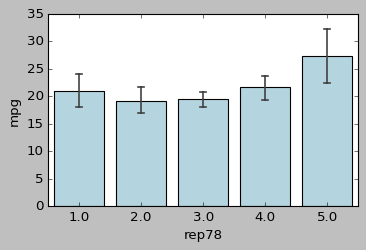

In [46]:
#useful to calc sum stats such as mean and have error bars
#sum stats-easily done in seaborn #note that fewer obs like on 5, bigger CI
fig, ax = plt.subplots(figsize=(5,3))
ax = sns.barplot(x="rep78", y="mpg", data=auto, estimator=np.mean, ci=95, capsize=.1, color='lightblue')

#of course can do that and more in mpl, for afficionados:
#https://www.statology.org/error-bars-python/
#https://pythonforundergradengineers.com/python-matplotlib-error-bars.html or https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.07-Error-Bars/

<ipython-input-47-00aa8e7ff68e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=auto, y='mpg', x='rep78',  hue='foreign',estimator=np.mean, ci=95, capsize=.1, orient='v',ax=ax);


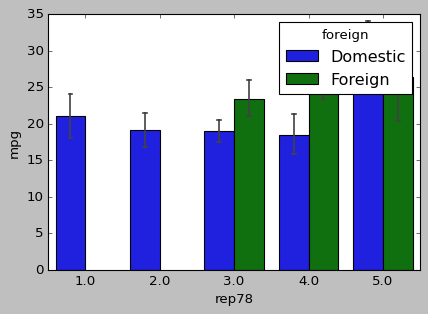

In [47]:
#summary stats such as mean of var on y axis by categories on x axis
#and possibly 3rd var as colors of bars is a *true workhorse*--use it a lot,
#should have at least several of those--they can really get some insights
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=auto, y='mpg', x='rep78',  hue='foreign',estimator=np.mean, ci=95, capsize=.1, orient='v',ax=ax);

<ipython-input-48-b08cb8e6435b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=auto, y='mpg', x='foreign', hue='rep78',palette="Blues",estimator=np.mean, ci=95, capsize=.1, orient='v',ax=ax);


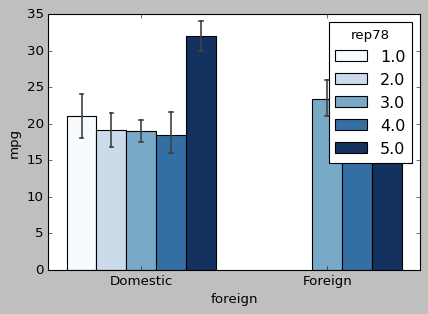

In [48]:
# flip x with hue: helps answer differnt question and find different insights

# previously the graph focuses on domestic-foreign diff within each rep78:
# rep78 1,2: no foreign; rep78 3,4: foreign higher mpg than domestic
# and rep78 5th cat, the other way round: higher mpg for domestic

#the 2nd setup focuses on comparisons within each domestic and foreign and across rep78:
# mpg on rep78 lower cat for domestic is much smaller than rep78 5
# among foreign cars not much difference across cat or rep78
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=auto, y='mpg', x='foreign', hue='rep78',palette="Blues",estimator=np.mean, ci=95, capsize=.1, orient='v',ax=ax);
#note have palette if many cat, otherwhise optical illusion

In [ ]:
#pandas bar charts; skip; just use matplotlib or seaborn
#ax=auto[['make', 'price']][0:3].plot(kind='barh')
#ax.set_yticklabels(auto.make);
#ax=auto[['make', 'price','weight']][0:5].plot(kind='barh') #stacked=True
#ax.set_yticklabels(auto.make);

#btw for a categorical variable histogram looks like a bar chart, but bar chart has typivally >= 2vars, hist typically =1var
#auto.rep78.value_counts().plot(kind='barh') # counts/freq by cat #pandas
#fig, ax = plt.subplots(figsize = (3, 3)); ax.hist(auto.rep78,orientation='horizontal');

In [49]:
#relationships: for continuous vars (at least ordinal) do scatterplots; for nominal vars do crosstabs:
pd.crosstab(auto["rep78"], auto["foreign"])

foreign  Domestic  Foreign
rep78                     
1.0             2        0
2.0             8        0
3.0            27        3
4.0             9        9
5.0             2        9

<ipython-input-50-e794d63f1953>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a=auto.groupby(['foreign','rep78']).agg('count').reset_index() #.mpg


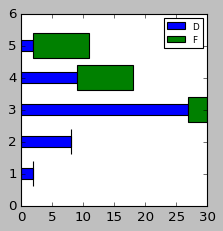

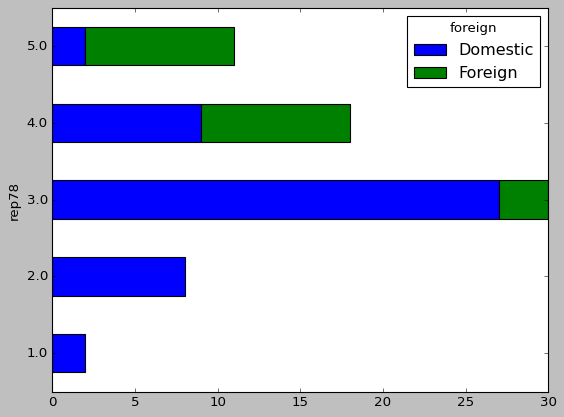

In [50]:
#and can plot them with bar charts

a=auto.groupby(['foreign','rep78']).agg('count').reset_index() #.mpg
a

bar_width = 0.35

fig, ax = plt.subplots(figsize = (3, 3))
ax.barh(a.rep78[a.foreign=='Domestic'],a.mpg[a.foreign=='Domestic'],bar_width,label='D')
ax.barh(a.rep78[a.foreign=='Foreign'],a.mpg[a.foreign=='Foreign'],left=a.mpg[a.foreign=='Domestic'],label='F') #or could overlay like in setup example
ax.legend(loc=1,prop={'size': 8})

#or in pandas
#pd.crosstab(auto["rep78"], auto["foreign"]).plot(kind='barh')
pd.crosstab(auto["rep78"], auto["foreign"]).plot(kind='barh',stacked=True);

## lineplots / time series data

when you have data over time, the first thing is to plot it as we did with API data (WB, FRED) earlier

several variations on lineplots follow using time series data

so unlike distribution and ranking, which everyone will use, this is only for time series data



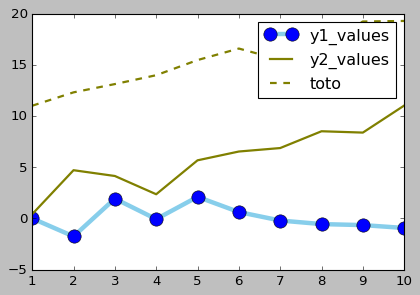

In [51]:
#first make some data
df=pd.DataFrame({'x_values': range(1,11), 'y1_values': np.random.randn(10), 'y2_values': np.random.randn(10)+range(1,11), 'y3_values': np.random.randn(10)+range(11,21) })
#multiple line plots
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
ax.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)
ax.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
ax.legend();

In [ ]:
#LATER have lineplot with 2 y axes

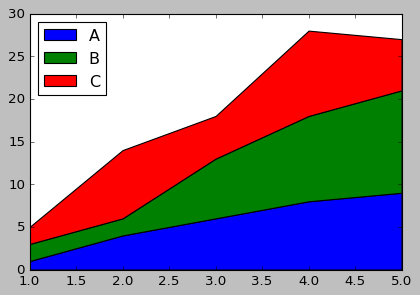

In [52]:
#stacked area, eg worth of each of 3 big tech that adds up to total worth of all 3
#make some data:
x=range(1,6); y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
fig, ax = plt.subplots(figsize=(6, 4))
ax.stackplot(x,y, labels=['A','B','C'])
ax.legend(loc='upper left');

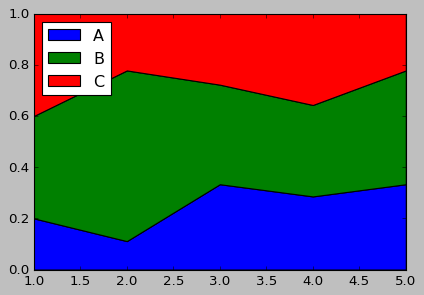

In [53]:
#percentage stacked area, eg market share--always adds up to 100,
#but share of each company evolves over time
#make some data:
data = pd.DataFrame({  'group_A':[1,4,6,8,9], 'group_B':[2,24,7,10,12], 'group_C':[2,8,5,10,6], }, index=range(1,6))
data_perc = data.divide(data.sum(axis=1), axis=0) #transform data from raw to percent

fig, ax = plt.subplots(figsize=(6, 4))
ax.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['A','B','C'])
ax.legend(loc='upper left');
#ax.margins(0,0)
#ax.title('100 % stacked area chart');

## relationship / scatterplots

especially for continuous vars or at least ordinal; note can have 3 vars in scatterplots, 3rd being color (or size or marker)

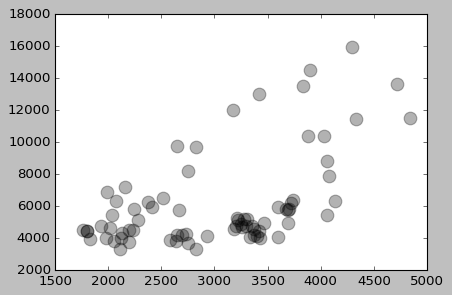

In [54]:
#basic scatterplot
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(auto.weight,auto.price, c='black', s=130, alpha=0.3);

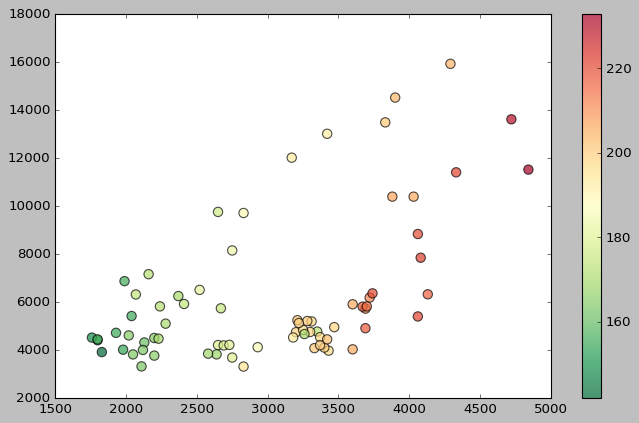

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
s=ax.scatter(auto.weight,auto.price, c=auto.length, cmap='RdYlGn_r', s=70,alpha=0.7,edgecolors="black")
fig.colorbar(s, anchor=(0, 0), shrink=1);
#a see http://stats.stackexchange.com/questions/11984/how-can-i-remove-the-z-order-bias-of-a-coloured-scatter-plot
###btw could add 4th var as circle radius:
#https://seaborn.pydata.org/examples/scatterplot_sizes.html
#but its mess--need fewer cat! and need like RdYlGn

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   make    74 non-null     object
 1   weight  74 non-null     int16 
 2   mpg     74 non-null     int16 
dtypes: int16(2), object(1)
memory usage: 1.4+ KB


Text(2930, 22, 'AMC Concord')

Text(3350, 17, 'AMC Pacer')

Text(2640, 22, 'AMC Spirit')

Text(3250, 20, 'Buick Century')

Text(4080, 15, 'Buick Electra')

Text(3670, 18, 'Buick LeSabre')

Text(2230, 26, 'Buick Opel')

Text(3280, 20, 'Buick Regal')

Text(3880, 16, 'Buick Riviera')

Text(3400, 19, 'Buick Skylark')

Text(4330, 14, 'Cad. Deville')

Text(3900, 14, 'Cad. Eldorado')

Text(4290, 21, 'Cad. Seville')

Text(2110, 29, 'Chev. Chevette')

Text(3690, 16, 'Chev. Impala')

Text(3180, 22, 'Chev. Malibu')

Text(3220, 22, 'Chev. Monte Carlo')

Text(2750, 24, 'Chev. Monza')

Text(3430, 19, 'Chev. Nova')

Text(2120, 30, 'Dodge Colt')

Text(3600, 18, 'Dodge Diplomat')

Text(3600, 16, 'Dodge Magnum')

Text(3740, 17, 'Dodge St. Regis')

Text(1800, 28, 'Ford Fiesta')

Text(2650, 21, 'Ford Mustang')

Text(4840, 12, 'Linc. Continental')

Text(4720, 12, 'Linc. Mark V')

Text(3830, 14, 'Linc. Versailles')

Text(2580, 22, 'Merc. Bobcat')

Text(4060, 14, 'Merc. Cougar')

Text(3720, 15, 'Merc. Marquis')

Text(3370, 18, 'Merc. Monarch')

Text(4130, 14, 'Merc. XR-7')

Text(2830, 20, 'Merc. Zephyr')

Text(4060, 21, 'Olds 98')

Text(3310, 19, 'Olds Cutl Supr')

Text(3300, 19, 'Olds Cutlass')

Text(3690, 18, 'Olds Delta 88')

Text(3370, 19, 'Olds Omega')

Text(2730, 24, 'Olds Starfire')

Text(4030, 16, 'Olds Toronado')

Text(3260, 28, 'Plym. Arrow')

Text(1800, 34, 'Plym. Champ')

Text(2200, 25, 'Plym. Horizon')

Text(2520, 26, 'Plym. Sapporo')

Text(3330, 18, 'Plym. Volare')

Text(3700, 18, 'Pont. Catalina')

Text(3470, 18, 'Pont. Firebird')

Text(3210, 19, 'Pont. Grand Prix')

Text(3200, 19, 'Pont. Le Mans')

Text(3420, 19, 'Pont. Phoenix')

Text(2690, 24, 'Pont. Sunbird')

Text(2830, 17, 'Audi 5000')

Text(2070, 23, 'Audi Fox')

Text(2650, 25, 'BMW 320i')

Text(2370, 23, 'Datsun 200')

Text(2020, 35, 'Datsun 210')

Text(2280, 24, 'Datsun 510')

Text(2750, 21, 'Datsun 810')

Text(2130, 21, 'Fiat Strada')

Text(2240, 25, 'Honda Accord')

Text(1760, 28, 'Honda Civic')

Text(1980, 30, 'Mazda GLC')

Text(3420, 14, 'Peugeot 604')

Text(1830, 26, 'Renault Le Car')

Text(2050, 35, 'Subaru')

Text(2410, 18, 'Toyota Celica')

Text(2200, 31, 'Toyota Corolla')

Text(2670, 18, 'Toyota Corona')

Text(2160, 23, 'VW Dasher')

Text(2040, 41, 'VW Diesel')

Text(1930, 25, 'VW Rabbit')

Text(1990, 25, 'VW Scirocco')

Text(3170, 17, 'Volvo 260')

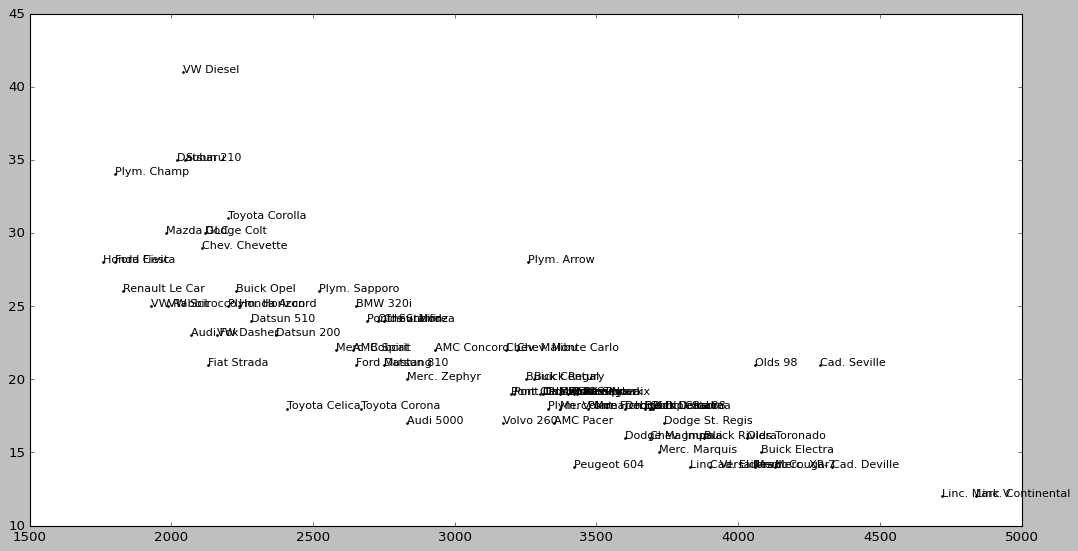

In [56]:
#label points, clunky, don't worry about it, just label by hand few points you need or use interactive plotly (later class)
#https://stackoverflow.com/questions/14432557/scatter-plot-with-different-text-at-each-data-point
#https://datascienceparichay.com/article/matplotlib-label-points-on-scatter-plot/
#https://dataplotplus.com/add-text-labels-scatter-plot-in-python/
fig, ax = plt.subplots(figsize=(16,8)) #make it wide so can read labels better

#KLUDGE
#must sort on index, likely enumerate (0,1,2,...) must be same as index; and check for missing info! may be a problem too
# and then double check scatter plot labels for integrity; be careful!
#TODO/LATER do it better, maybe have key var as index, the one that goes on plt as txt
auto=auto.sort_index()
auto[['make','weight','mpg']].info()

ax.scatter(auto['weight'],auto['mpg'],s=2)

for i, txt in enumerate(auto['make']):
    ax.annotate(txt, (auto['weight'][i],auto['mpg'][i]),fontsize=10)
#at least can id outliers; still many overlap, later we will cover zooming and popups

#LATER/MAYBE can also jitter points
#https://stackoverflow.com/questions/53093560/python-scatter-plot-overlapping-data
#https://julienbeaulieu.gitbook.io/wiki/sciences/programming/data-analysis/data-visualization/bivariate-exploration-of-data/overplotting-transparency-and-jitter
#https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python

#another way
#def label_point_orig(x, y, val, ax):
#    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#    print(a)
#    for i, point in a.iterrows():
#        ax.text(point['x'], point['y'], str(point['val']),fontsize=7, color='black')
#
#plt.scatter(auto.weight, auto.length,s=5)
#label_point_orig(auto.weight, auto.length, auto.make, plt)

In [58]:
#fancy! can automatically adjust text with this package
!pip install adjustText
from adjustText import adjust_text
#https://adjusttext.readthedocs.io/en/latest/Examples.html
#https://www.python-graph-gallery.com/web-text-repel-with-matplotlib

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   make    74 non-null     object
 1   weight  74 non-null     int16 
 2   mpg     74 non-null     int16 
dtypes: int16(2), object(1)
memory usage: 3.5+ KB


([Text(3042.1975806451615, 22.8544921875, 'AMC Concord'),
  Text(3522.5302419354834, 16.6923828125, 'AMC Pacer'),
  Text(2758.7016129032263, 21.9658203125, 'AMC Spirit'),
  Text(3409.828629032258, 21.5380859375, 'Buick Century'),
  Text(4227.479838709677, 15.5126953125, 'Buick Electra'),
  Text(4331.905241935484, 19.0595703125, 'Buick LeSabre'),
  Text(2370.423387096774, 26.5126953125, 'Buick Opel'),
  Text(3375.6149193548385, 20.7177734375, 'Buick Regal'),
  Text(4071.9354838709683, 16.5126953125, 'Buick Riviera'),
  Text(3940.1713709677424, 20.0595703125, 'Buick Skylark'),
  Text(4542.752016129032, 14.68359375, 'Cad. Deville'),
  Text(3996.6733870967737, 13.282226562499998, 'Cad. Eldorado'),
  Text(4448.770161290323, 21.32470703125, 'Cad. Seville'),
  Text(2353.8004032258063, 28.9658203125, 'Chev. Chevette'),
  Text(3875.23185483871, 15.4189453125, 'Chev. Impala'),
  Text(3534.717741935484, 23.0595703125, 'Chev. Malibu'),
  Text(3402.2782258064517, 22.3759765625, 'Chev. Monte Carlo')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

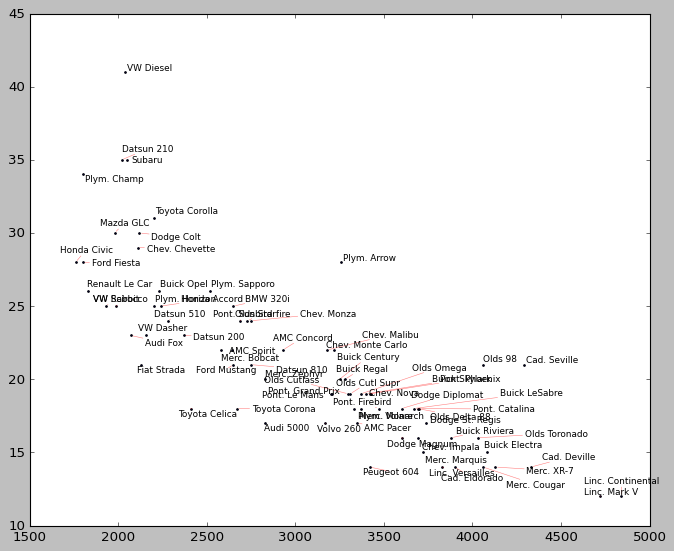

In [59]:
fig, ax = plt.subplots(figsize=(10,8))
auto=auto.sort_index()
auto[['make','weight','mpg']].info()

ax.scatter(auto['weight'],auto['mpg'],s=2)
#before adj text need to make a list of labels to feed into adjust_text function
#sth like this with loop and append, but the format not right for the adjust_text
#texts=[]
#for i, txt in enumerate(auto['make']):
#    texts.append([txt, (auto['weight'][i],auto['mpg'][i])])
#this works as list comprehension
texts = [plt.text(auto['weight'][i],auto['mpg'][i], auto['make'][i],fontsize=8) for i in range(len(auto))]
adjust_text(texts,arrowprops=dict(arrowstyle='-', color='red', alpha=.5,lw=.5)) #and there's ton of options to tweak it more
plt.savefig('scLab.pdf')
files.download('scLab.pdf') #download and open in pdf viewer and zoom in, quality!

Text(2100, 42, 'vw diesel')

Text(3300, 27, 'plym arrow')

Text(2100, 35, 'blah plt txt')

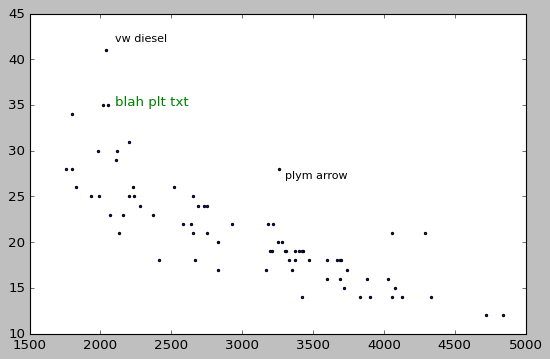

In [60]:
#cleaner just label outliers or whatever interesting points, i'd just use this; to id all points interactively later plotly
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(auto['weight'],auto['mpg'],s=4)
ax.annotate('vw diesel',(2100,42),fontsize=10)
ax.annotate('plym arrow',(3300,27),fontsize=10)

#or my new fav plt.text, cleaner/more logical than ax.annotate
plt.text(2100,35,'blah plt txt',color='green')

In [ ]:
#next sns, adjust theme/style eg so that tick labels dont overlap: plt style classic causes pairplot to have too many ticks on x and labels to overlap
plt.style.use('default') # so we change to default
#other stuff may play with
#sns.set_style("ticks")
#sns.set_context("notebook", font_scale=.5, rc={"lines.linewidth": 2.5})
#sns.axes_style()

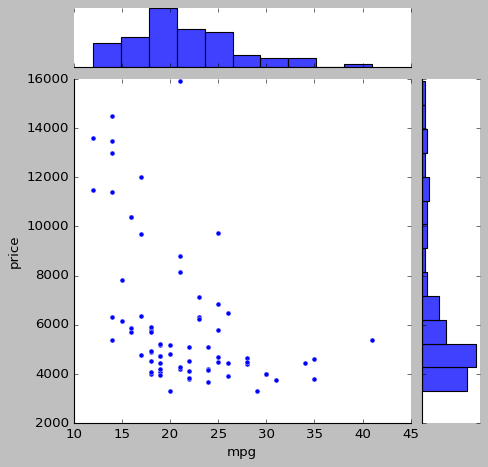

In [61]:
#sns scatterplot with histograms; in mpl https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html
sns.jointplot(x ='mpg', y ='price', data = auto); #, kind ='kde'

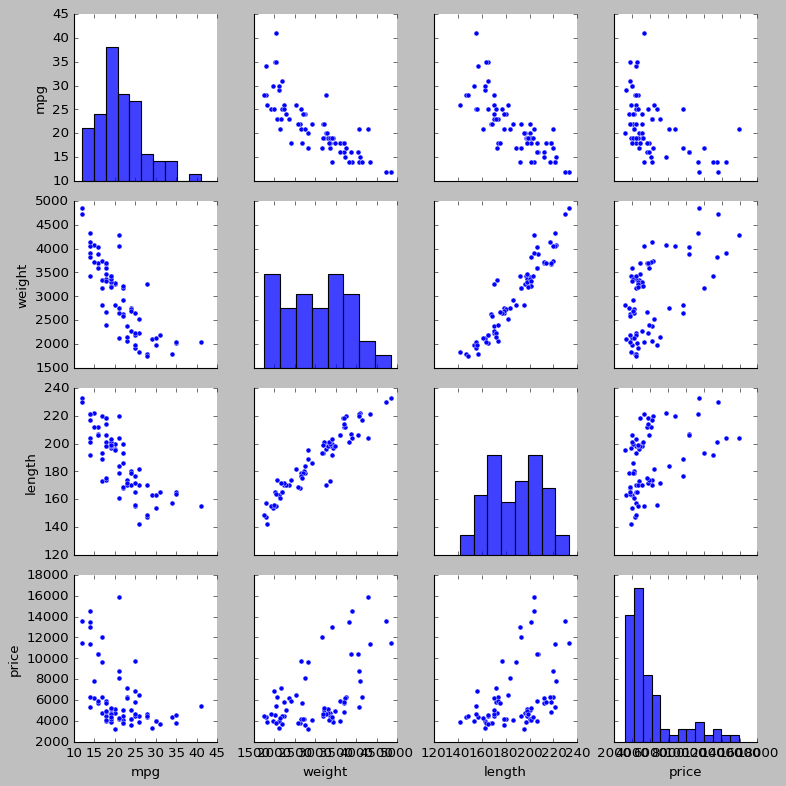

In [62]:
#corr matrix: very handy to get first quick idea about relationships in data, like corr matrix https://www.python-graph-gallery.com/correlogram/
sns.pairplot(auto[['mpg','weight','length','price']]) #,height=2,aspect=1

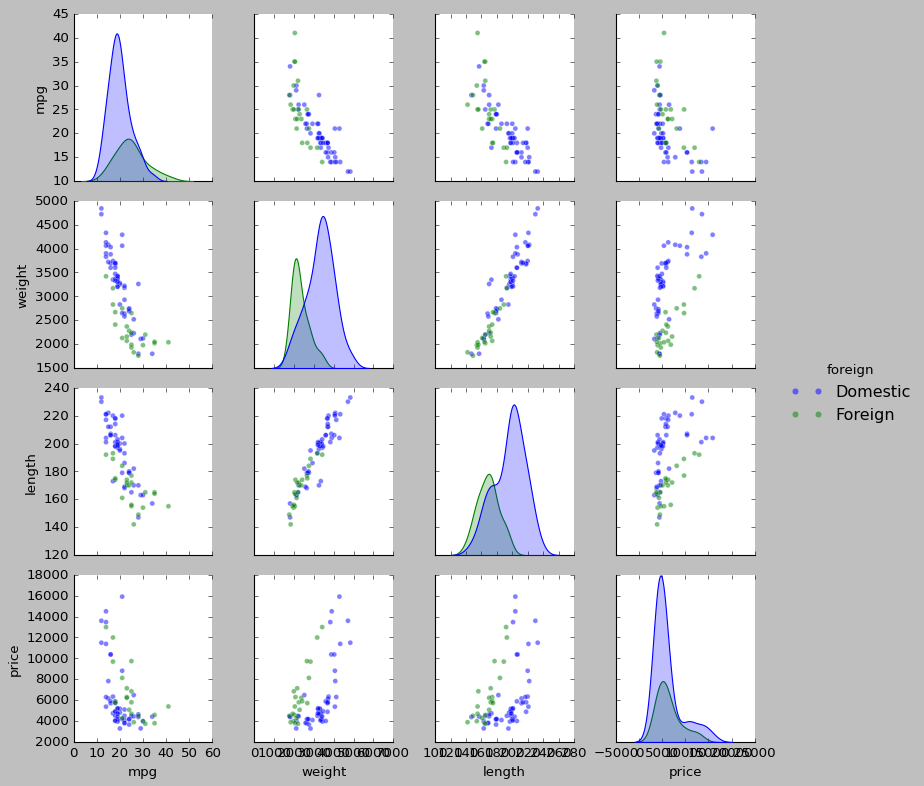

In [63]:
sns.pairplot(auto[['mpg','weight','length','price','foreign']],
             kind='scatter', plot_kws={'alpha': 0.5},
             hue='foreign')
#density plots are interesting, eg: mpg similar lower end, upper higher for foreign etc etc

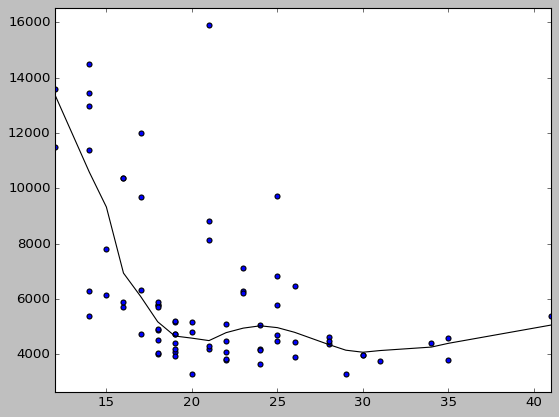

In [64]:
#lowess useful to figure out nonlinearities in relationship
import statsmodels.api as sm
smoothed = sm.nonparametric.lowess(exog=auto.mpg, endog=auto.price, frac=0.3) #lo, more wiggly

fig, ax = plt.subplots()
ax.scatter(auto.mpg,auto.price)
ax.plot(smoothed[:, 0], smoothed[:, 1], c="k")
plt.autoscale(enable=True, axis="x", tight=True)
#https://www.statsmodels.org/dev/examples/notebooks/generated/lowess.html
#https://james-brennan.github.io/posts/lowess_conf/
#https://stackoverflow.com/questions/31104565/confidence-interval-for-lowess-in-python
#https://stackoverflow.com/questions/42637579/how-to-compute-and-plot-a-lowess-curve-in-python

<Axes: xlabel='longitude', ylabel='latitude'>

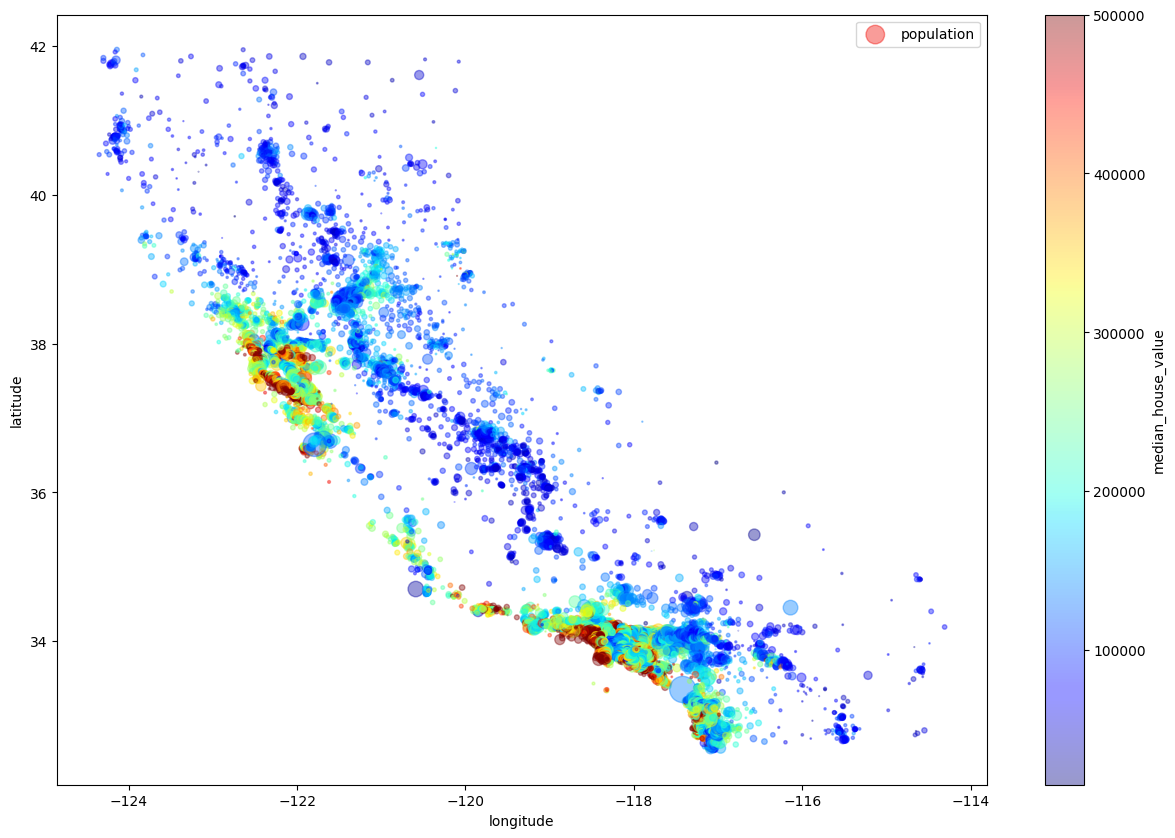

In [65]:
#maps later but note that a simple scatter against lat and long gives a map :)
plt.style.use('default')
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population',
figsize=(15, 10), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()
plt.style.use('classic')

## clustering

a bit similar to previous scatterplots; clustering is about grouping / finding patterns, and very much data sciency!

we only scratch the surface here--just few popular vis for clustering; i don't cover here the method, alghoritms etc

see handy https://jakevdp.github.io/PythonDataScienceHandbook and especially machine learning ch:
https://jakevdp.github.io/PythonDataScienceHandbook/05.00-machine-learning.html

and the key Py library for clustering  including technical  and comprehensive documentation is:  
https://scikit-learn.org/stable/modules/clustering.html




In [66]:
plt.style.use('default')  #delicate modernity
#plt.style.use('classic') #back to 90s

In [67]:
#im new to clustering so to figure it out i just keep 2 vars and 2 dozens cars
df = auto[['make','weight','price']].set_index('make') # mpg# 'turn','displacement','trunk','rep78','gear_ratio' #'make','mpg','weight','length','price','turn','displacement','trunk','rep78','gear_ratio'
ind_list = ['Cad. Deville','Cad. Eldorado','Cad. Seville','Chev. Chevette','Chev. Impala','Chev. Malibu','Dodge Colt','Ford Fiesta','Linc. Continental','Linc. Mark V','Olds 98','Plym. Arrow','Plym. Champ','Datsun 210','Datsun 510','Datsun 810','Honda Accord','Honda Civic','Toyota Celica','Toyota Corolla','VW Diesel']
df=df.loc[ind_list]

In [68]:
df[:].style.background_gradient(cmap="RdYlGn")

ok Cad heavy and pricey; toyotas and hondas opposite; and some mix in between

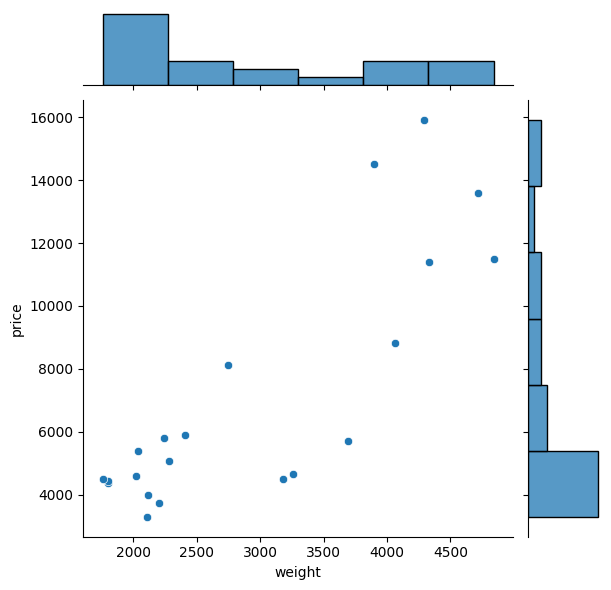

In [69]:
sns.jointplot(x ='weight', y ='price', data = df); #, kind ='kde'

most cheap and light big chunk of distr; little in the middle and little bump at the top of distr

In [70]:
#just for dendogram set index to all key vars so that i know by looking at labels what they exactly are on all vars and can make sense of the results
df = auto[['make','weight','price']].set_index(['make','weight','price'],drop=False) # 'turn','displacement','trunk','rep78','gear_ratio' #'make','mpg','weight','length','price','turn','displacement','trunk','rep78','gear_ratio'
df=df.loc[ind_list]
df.drop(columns='make',inplace=True)

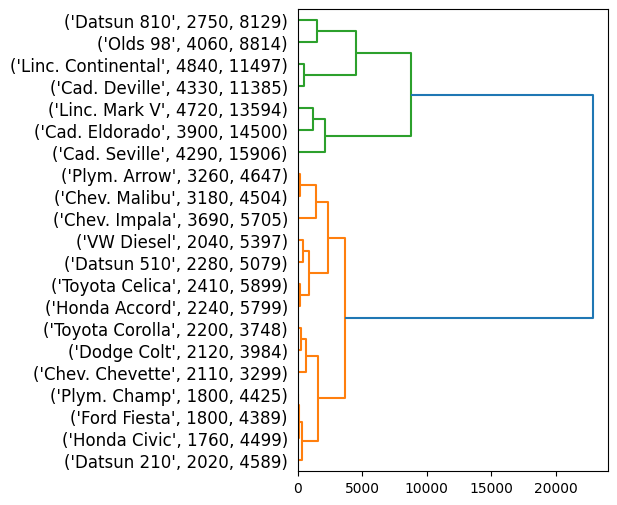

In [71]:
from scipy.cluster import hierarchy #normally always at the top; but here just used locally for this sub-sec

fig, ax = plt.subplots(figsize = (4, 6))
#https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
#https://www.python-graph-gallery.com/dendrogram
Z = hierarchy.linkage(df, 'ward') # Calculate the distance between each sample
hierarchy.dendrogram(Z, orientation="right", labels=df.index,leaf_font_size=12,ax=ax);

In [72]:
!pip install adjustText #make sure have it
from adjustText import adjust_text #and then set index just to make for labelling purposes
df = auto[['make','weight','price']].set_index(['make'],drop=False) # 'turn','displacement','trunk','rep78','gear_ratio' #'make','mpg','weight','length','price','turn','displacement','trunk','rep78','gear_ratio'
df=df.loc[ind_list]

<ipython-input-73-a74e59285732>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts = [plt.text(df['weight'][i],df['price'][i], df['make'][i],fontsize=9) for i in range(len(df))]


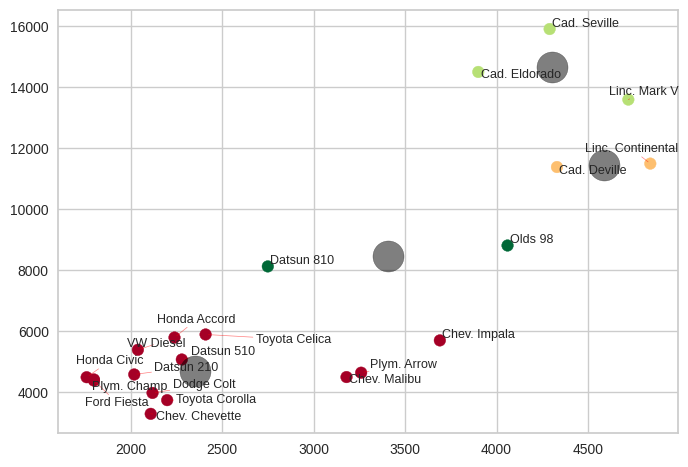

In [73]:
#and we'll plot kmeans clustering
#https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
#https://www.reneshbedre.com/blog/kmeans-clustering-python.html
#https://www.scikit-yb.org/en/latest/index.html
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import silhouette_visualizer

kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['weight','price']])
y_kmeans = kmeans.predict(df[['weight','price']])

fig, ax = plt.subplots()
ax.scatter(df.weight,df.price,c=y_kmeans,s=70, cmap='RdYlGn')

texts = [plt.text(df['weight'][i],df['price'][i], df['make'][i],fontsize=9) for i in range(len(df))]
adjust_text(texts,arrowprops=dict(arrowstyle='-', color='red', alpha=.5,lw=.5)) #and there's ton of options to tweak it more

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=500, alpha=0.5);

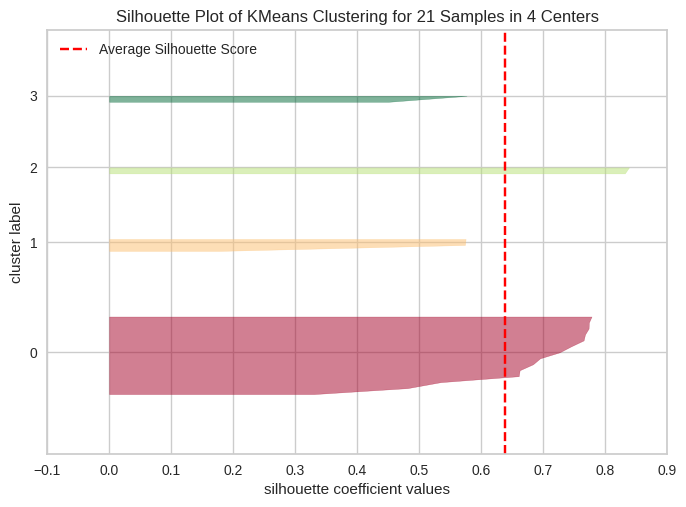

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a38e877f0>,
                     colors='RdYlGn',
                     estimator=KMeans(n_clusters=4, random_state=42))

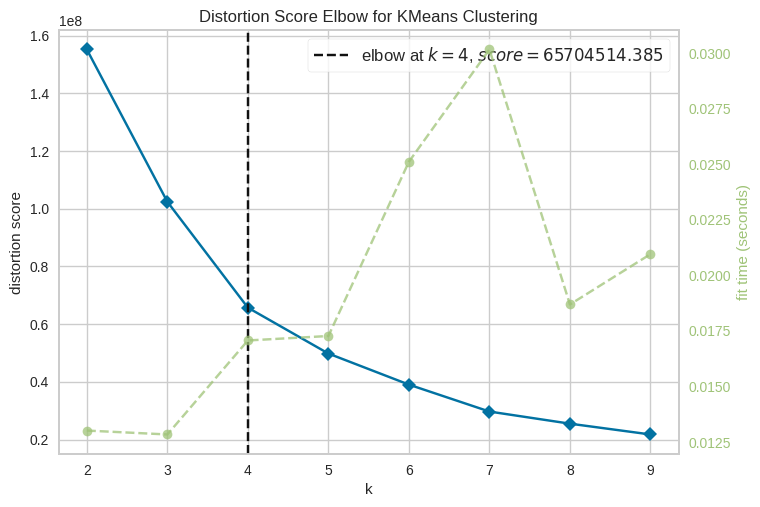

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a38b43a90>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [ ]:
#and diagnostics
silhouette_visualizer(KMeans(4, random_state=42), df[['weight','price']], colors='RdYlGn') #higher vals=better separation between clusters
kelbow_visualizer(KMeans(random_state=4), auto[['weight','price']], k=(2,10))

## [mar6] vis by others:  examples

code only; for vis only examples see examples sec in https://theaok.github.io/vis/theory.pdf




btw the academic paper is dead: https://www.theatlantic.com/science/archive/2018/04/the-scientific-paper-is-obsolete/556676/ (and the next thing is of course jupyter notebook!)

SF drug geography
https://nbviewer.org/github/lmart999/GIS/blob/master/SF_GIS_Crime.ipynb

check out these awesome sci paper ready plots:
https://github.com/jbmouret/matplotlib_for_papers

and then i have one paper:
https://theaok.github.io/docs/swbPopGroBrfss_againStudentComSwb.pdf
for which i have done vis in Py:
https://colab.research.google.com/drive/1fFzDc73LbGAC-G6_I58FV1fH691NAs7_?usp=sharing

and now i have another one:
https://colab.research.google.com/drive/1ezeEp5suhB9sev3Kj0NFk1io5FHC9EtO?usp=sharing

[*] if you use educ data:

https://www.kaggle.com/code/barkhaverma/student-performance-analysis/notebook

https://github.com/taranahassan/School_District_Analysis/blob/main/notebook/PyCitySchools.ipynb

## advanced mpl

(and there's way more to mpl; see links under basics / setup: mpl)


first lets loop back basics / setup mpl sec and go over stuff there again and then extend here

(0.0, 12.0, 0.0, 10.0)

Text(0.5, 0.98, 'bold figure suptitle')

Text(0.5, 1.0, 'axes title')

Text(0.5, 0, 'xlabel')

Text(0, 0.5, 'ylabel')

Text(3, 8, 'boxed italics text in data coords')

Text(2, 6, 'an equation: $E=mc^2$')

Text(3, 4, 'annotate')

Text(8, 4, 'bla blah')

Text(0.5, 0.98, '2nd bold figure suptitle')

Text(0.5, 0.5, 'ax0')

Text(0.5, 0.5, 'ax1')

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

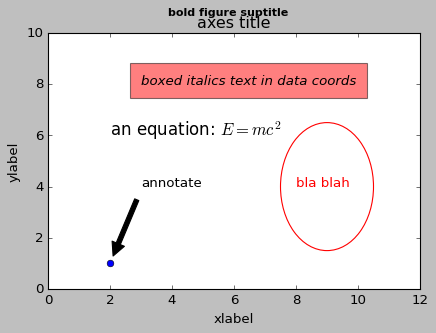

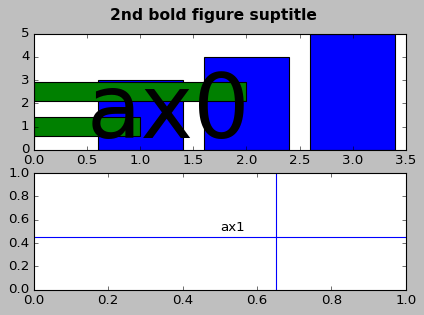

In [ ]:
### first adding text and stuff like arrows elipses boxes; http://matplotlib.org/users/text_intro.html
#note that in stata can add tex too: scatter mpg price, text(20 1000 "hello", color(black))
#https://wesmckinney.com/book/plotting-and-visualization.html

from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize = (6,4))
ax.axis([0, 12, 0, 10]) #axes 0-10

fig.suptitle('bold figure suptitle', fontsize=10, fontweight='bold') #there's no 'title'
#fig.subplots_adjust(top=0.85) #add spaing between title and ax title

ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.plot([2], [1], 'o') #put a point
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4), #put arrow
            arrowprops=dict(facecolor='black', lw=1,shrink=.1))

e1 = Ellipse(xy=(9, 4), width=3, height=5, edgecolor='r', fc='None', lw=1)
ax.add_patch(e1)
ax.text(8, 4, r'bla blah', fontsize=12, color='r')


fig, axs = plt.subplots(2,1,figsize = (6,4))
fig.suptitle('2nd bold figure suptitle', fontsize=14, fontweight='bold')
axs[0].text(.5,.5,'ax0',fontsize=40)
axs[1].text(.5,.5,'ax1')

axs[0].bar([1,2,3],[3,4,5]) #Plot vertical rectangles (constant width)
axs[0].barh([0.5,1,2.5],[0,1,2]) #Plot horiontal rectangles (constant height)
axs[1].axhline(0.45) #Draw a horizontal line across axes
axs[1].axvline(0.65) #Draw a vertical line across axes

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/theaok/vis/main/timSer.csv')

Text(0.5, 0, 'yr')

Text(0, 0.5, 'value')

Text(0.5, 1.0, 'blah')

Text(28, 20, '')

Text(28, 30, '2008 - 2012  flu pandemic')

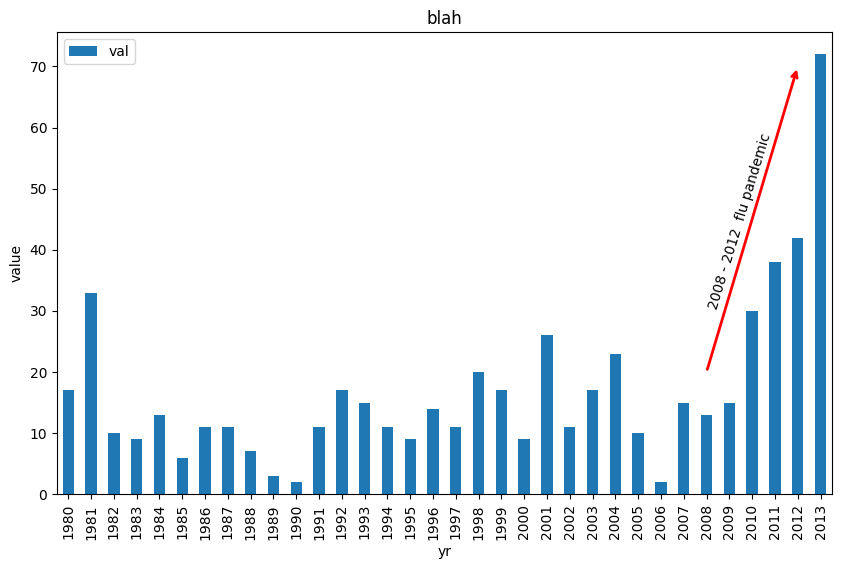

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))

df.plot(kind='bar', x='yr',y='val', figsize=(10, 6), rot=90,ax=ax)

plt.xlabel('yr')
plt.ylabel('value')
plt.title('blah')
ax.legend(loc=0)

#arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , val 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , val 20)
             xycoords='data',  # will use the coordinate system of the vis
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
             )

#text
plt.annotate('2008 - 2012  flu pandemic',  # text to display
             xy=(28, 30),  # start the text at (year 2008 , val 30)
             rotation=73,  # to match the arrow
             va='bottom',  #  'bottom' text to be vertically aligned
             ha='left',    # 'left'  text to be horizontally  aligned
             )

Text(0.5, 0.5, 'ax1')

Text(0.5, 0.5, 'ax2')

Text(0.5, 0.5, 'ax3')

Text(0.5, 0.5, 'ax4')

Text(0.5, 0.5, 'ax5')

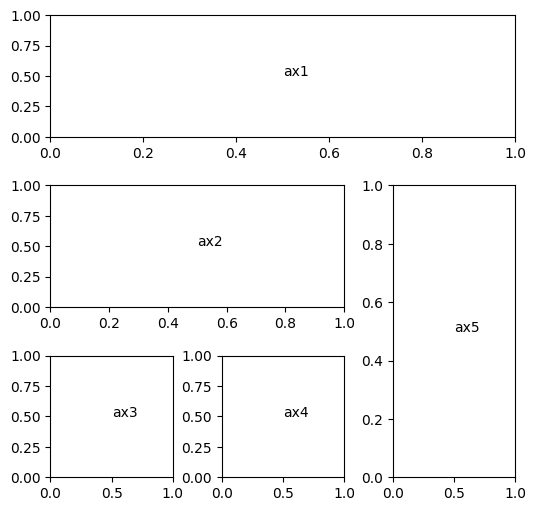

In [ ]:
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(figsize = (6,6))

ax = plt.GridSpec(3, 3)
ax.update(wspace=0.4, hspace=0.4) #add extra padding, it's tight there

ax1 = plt.subplot(ax[0,0:3]); ax1.text(.5,.5,'ax1') #:3 is up to 3 but not incl it, so really througout 2
ax2 = plt.subplot(ax[1,0:2]); ax2.text(.5,.5,'ax2')
ax3 = plt.subplot(ax[2,0]); ax3.text(.5,.5,'ax3')
ax4 = plt.subplot(ax[2,1]); ax4.text(.5,.5,'ax4')
ax5 = plt.subplot(ax[1:3,2]); ax5.text(.5,.5,'ax5')

#alt
#asymmetrical arrangements http://matplotlib.org/users/gridspec.html
#fig = plt.figure()
#ax1 = plt.subplot2grid((3,3), (0,0), colspan=3); ax1.text(.5,.5,'ax1')
#ax2 = plt.subplot2grid((3,3), (1,0), colspan=2); ax2.text(.5,.5,'ax2')
#ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2); ax3.text(.5,.5,'ax3')
#ax4 = plt.subplot2grid((3,3), (2, 0)); ax4.text(.5,.5,'ax4')
#ax5 = plt.subplot2grid((3,3), (2, 1)); ax5.text(.5,.5,'ax5')

#### markers

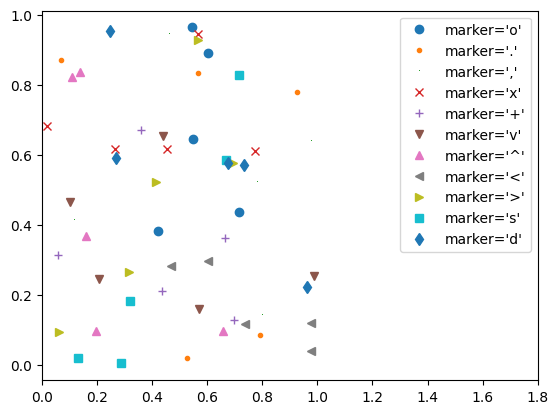

In [ ]:
#theres a bunch of different markers #https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

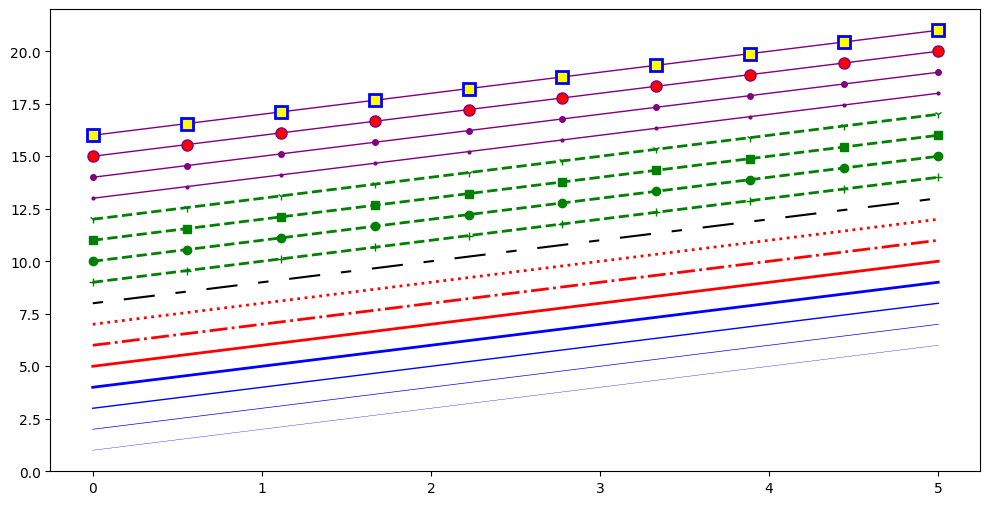

In [ ]:
x = np.linspace(0, 5, 10)
y = x ** 2

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8,
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

nice vis of

errorbars:
https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html

contours
https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

### got photos?

this is mostly for digital humanities folks; but others can have some art time too!

In [ ]:
!wget -q -O arrow.jpg https://www.guyswithrides.com/wp-content/uploads/2019/12/00u0u_dIYGqThsKq0_1200x900-1.jpg
img = plt.imread("arrow.jpg")

Text(0, 0.5, 'price')

Text(0.5, 0, 'weight\n\n(background image: 1979 Plymouth Arrow)')

(2000.0, 20000.0)

(1500.0, 5000.0)

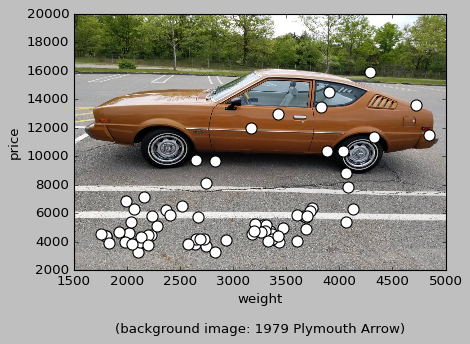

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylabel('price')
ax.set_xlabel('''weight

(background image: 1979 Plymouth Arrow)''')
ax.set_ylim([2000,20000])
ax.set_xlim([1500,5000])
#ax.set_aspect(1/3)

ax.scatter(auto.weight,auto.price, c='white', s=100, alpha=1)
ax.imshow(img, aspect='auto',extent=[1500,5000,2000,20000]) #zorder=1,alpha=.6,interpolation='nearest'

In [ ]:
!wget -q -O cont.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/1978_Lincoln_Continental_Town_Car_%2821913289119%29.jpg/800px-1978_Lincoln_Continental_Town_Car_%2821913289119%29.jpg
cont = plt.imread("cont.jpg")

!wget -q -O dats.jpg https://i.pinimg.com/originals/02/9e/e0/029ee01c726ea32b5954fd16139571cf.jpg
dats = plt.imread("dats.jpg")

[]

[]

Text(0, 0.5, 'Linc Continental: \nheavy, pricey, and terrible mpg')

[]

[]

Text(0, 0.5, 'Datsun 210: \nlight, cheap, and great mpg')

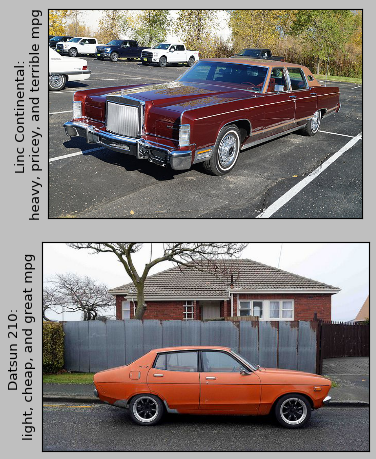

In [ ]:
#subplots
fig, axs = plt.subplots(2, 1,  tight_layout=True) #sharey=True,
axs[0].imshow(cont)
axs[0].set_yticks([])
axs[0].set_xticks([])
axs[0].set_ylabel('''Linc Continental:
heavy, pricey, and terrible mpg''')

axs[1].imshow(dats)
axs[1].set_yticks([])
axs[1].set_xticks([])
axs[1].set_ylabel('''Datsun 210:
light, cheap, and great mpg''')

In [ ]:
moto = pd.DataFrame({'ageGrp': ['10s','20s','30s','40s','50s'], #https://www.sciencedirect.com/science/article/pii/S2319417017300963
                   'mortality': [.2,1.3,1.8,1.7,2.3]
                   })
moto

!wget -q -O moto.jpg https://github.com/theaok/vis/raw/main/moto.jpg
m = plt.imread("moto.jpg")

ageGrp  mortality
0    10s        0.2
1    20s        1.3
2    30s        1.8
3    40s        1.7
4    50s        2.3

(0.0, 2.5)

(-0.5, 4.5)

<BarContainer object of 5 artists>

Text(0, 0.5, 'moto male mortality %')

Text(0.5, 0, 'age grp\n\nHsieh et al (2017)')

Text(-0.4, 0.05, 'good bones, \nsmall moto')

Text(0.6, 0.05, 'good bones, \nbigger moto')

Text(1.8, 0.05, 'still ok')

Text(2.8, 0.05, 'last call')

Text(2.8, 0.05, 'last call')

Text(3.7, 0.05, 'better \ndont fall')

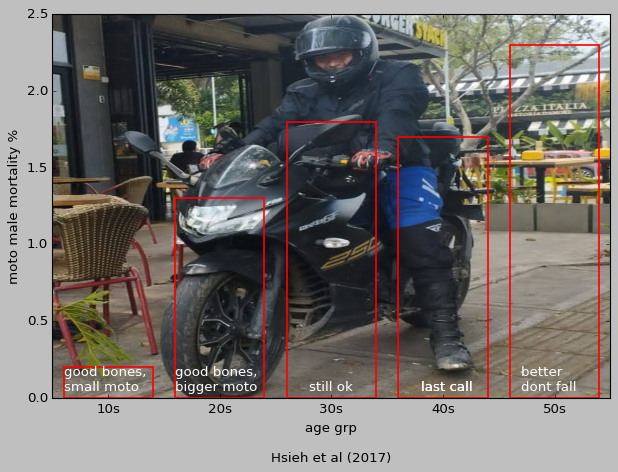

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_ylim([0,2.5])
ax.set_xlim([-.5,4.5])
ax.bar(moto.ageGrp, moto.mortality,lw=1.5,edgecolor='r',color='None')
ax.set_ylabel('moto male mortality %')
ax.set_xlabel('''age grp

Hsieh et al (2017)''')
ax.imshow(m, aspect='auto',extent=[-.5,4.5,0,2.5]) #zorder=1,alpha=.6,interpolation='nearest'
ax.annotate ('''good bones,
small moto''',(-.4,.05),color='w')
ax.annotate ('''good bones,
bigger moto''',(.6,.05),color='w')
ax.annotate ('''still ok''',(1.8,.05),color='w')
ax.annotate ('''last call''',(2.8,.05),color='w')
ax.annotate ('''last call''',(2.8,.05),color='w')
ax.annotate ('''better
dont fall''',(3.7,.05),color='w')

##notes to myself [dont worry about it]:



cover handy shortcuts like ctrl-enter to run cell; and learn others!!

vis by others: exemplary examples: do also have a bunch of normal lame graphs like boxplots etc that show sth cool like from these galeries examples tutorials online and ideally from research too--like eg the boxplots with blood pressure before after i had in stata dm class [ya reincorporate here from stata graphs: see dofile]; and do use what we covered with other data to show how to make totally awesome insights

### TODO for vis

per dendogram classification tree see scipy.py


and add more stats and graphs like  boxplots etc
https://datacarpentry.org/python-socialsci/13-matplotlib/index.html

### may put here TODO/LATER/MAYBE from throught the file, so its cleaner for students:

[from sec or graph] TODO...

###references

this is old!

TODO clean this up like delete stuff or incorporate elsewhere!


### SAVING CSV ONLINE                                                                                                              
for your own dataset can just save as csv somewhere online and feed the link like this                                             
just upload to google drive and share it, and cp file id, eg:                                                                      
1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8                                                                                                  
and put into                                                                                                                       
https://drive.google.com/uc?id=FILE-ID-GOES-HERE&export=download                                                                   
                                                                                                                                   
eg:                                                                                                                               
url="https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download"                                             
dat=pd.read_csv(url)                                                                                                               
 ### NOTEBOOKS                                                                                                                      
a ton of free online shells or notebooks eg:                                                                                       
                                                                                                                                   
super simple shell:                                                                                                                
https://www.python.org/shell/                                                                                                      
                                                                                                                                   
notebook:                                                                                                                          
https://cocalc.com/projects/2ad3cb5d-fc12-479b-993c-e62c1e68071a/files/Welcome%20to%20CoCalc.ipynb?session=default                 
                                                                                                                                   
and notably google's colab (need to have goog acct):                                                                               
https://colab.research.google.com/drive/1mJo0sJYI58rG63-IEjUOEFE_txQI9q3T                                                          
                                                                                                                                   
this would load your code from url, say github                                                                                     
https://notebooks.gesis.org/binder/


### bar charts
https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/


# dumped / reincorporate later maybe

## clustering

[this uses more vars and full dataset, and there's also here heatmap; but kinda messy and easy to get lost]

In [ ]:
df = auto[['make','mpg','weight','length','price','turn','displacement','trunk']].set_index('make') #' ,'rep78','gear_ratio'
#drop cat vars AND do some thinking!: retain vars theoretically linked

#can start with already covered colored list, skim through to get sense of patterns
#ie which vars go together across obs
df[:].style.background_gradient(cmap="Greens")

we see that lincolns and olds hi on most var, Cad too; but not Plym

mazda and honda lo on most var

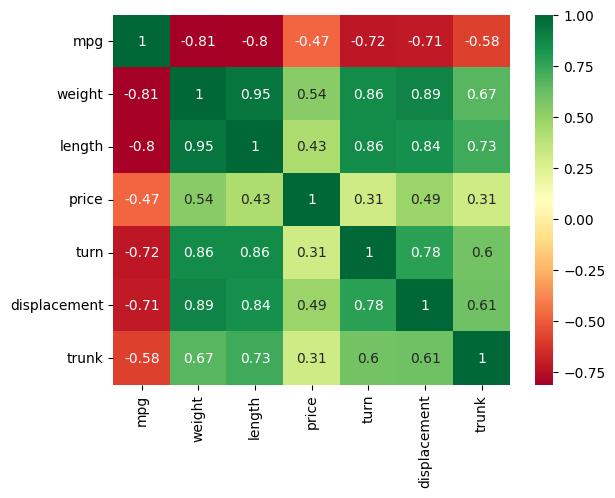

In [ ]:
#then can also do already covered corr mat
sns.heatmap(df.corr().round(2),cmap="RdYlGn",annot=True) # #some hi corr--they will drive clustering

weight and length go together as expected, and displacement too

mpg neg with most

price not that much rel with neither var

### dendogram and clustermap
next we procede with dendogram and clustermap to do clustering

disclaimer: i don't use these in my own research; this is only for illustrative purpose; to use properly read the documentation

REFS:

https://www.python-graph-gallery.com/dendrogram/

https://www.python-graph-gallery.com/404-dendrogram-with-heat-map

for a practical example in published researhc clustering cities see
https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0013541&type=printable p6

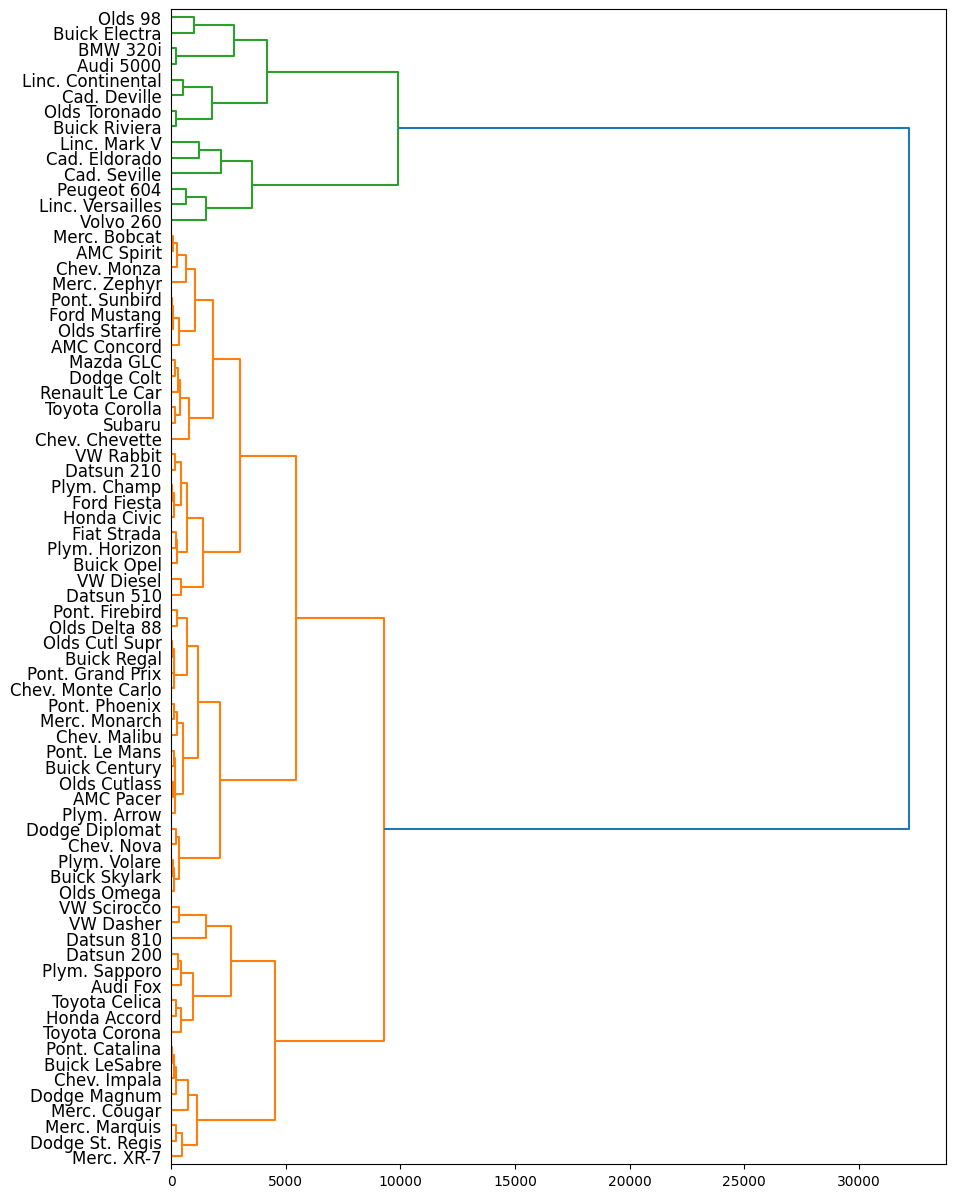

In [ ]:
from scipy.cluster import hierarchy #normally always at the top; but here just used locally for this sub-sec

fig, ax = plt.subplots(figsize = (10, 15))

#bunch of vars:
Z = hierarchy.linkage(df, 'ward') # Calculate the distance between each sample
hierarchy.dendrogram(Z, orientation="right", labels=df.index,leaf_font_size=12,ax=ax);

#can truncate it to have fewer categories by adding truncate_mode option and p number:
#truncate_mode = 'level', p=5  #  =<5 levels of tree
#truncate_mode = 'lastp', p=4  #  =4  leafs at the bottom of the plot
#but not super useful as names of cars disappear; just use the full dendogram and to reduce info focus on higher levels of the tree!

#from bottom: Merc together; then Honda+Toyota (smaller and cheaper); etc
#at the top: Olds, Buick, BMW, Audi, Linc, Cad--luxury

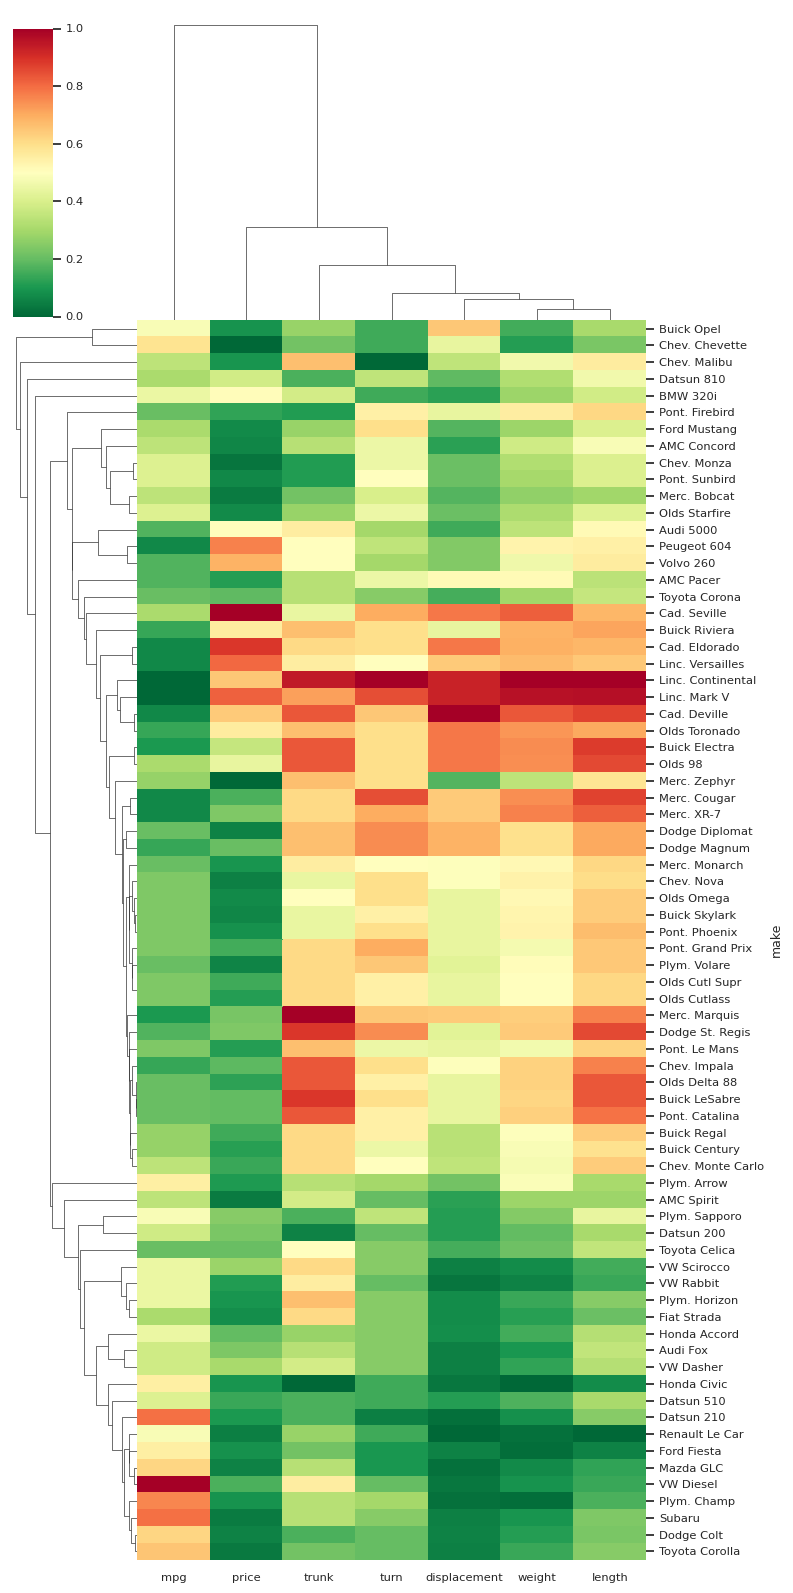

In [ ]:
sns.set(font_scale=.75) #need to play with font, otherwhise not all cars are labelled on the right
sns.clustermap(df, metric="correlation", method="single", cmap="RdYlGn_r", standard_scale=1,figsize=(8,16)) #, row_colors=row_colors

at the top: weight goes with length--yes!; and mpg goes most neg with others (again thats what we have seen from the corr matrix earlier!)

on left: american cars tend to go together
etc

BUT the results quite different from the dendogram above; again read the documentation per the methods and alghoritms used

### k-means

likewise here, the above disclaimer applies

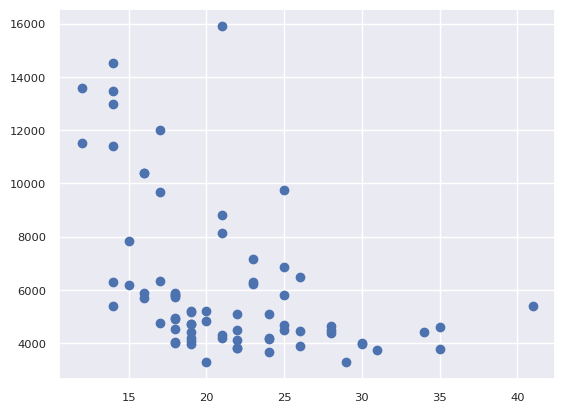

In [ ]:
fig, ax = plt.subplots()
ax.scatter(auto.mpg,auto.price);

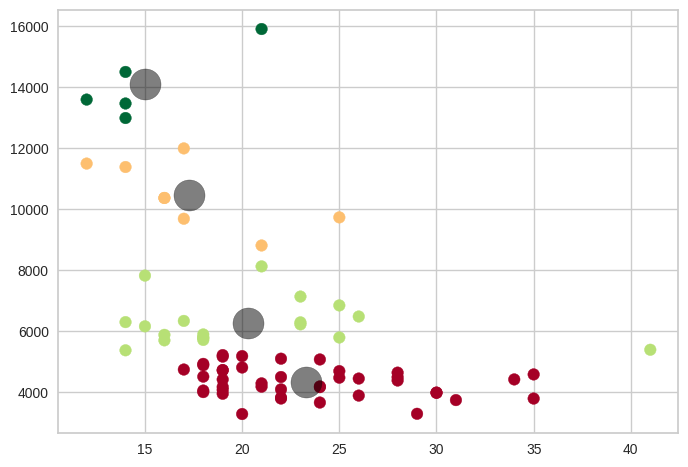

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import silhouette_visualizer

kmeans = KMeans(n_clusters=4)
kmeans.fit(auto[['mpg','price']])
y_kmeans = kmeans.predict(auto[['mpg','price']])

fig, ax = plt.subplots()
ax.scatter(auto.mpg,auto.price,c=y_kmeans,s=70, cmap='RdYlGn')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=500, alpha=0.5);

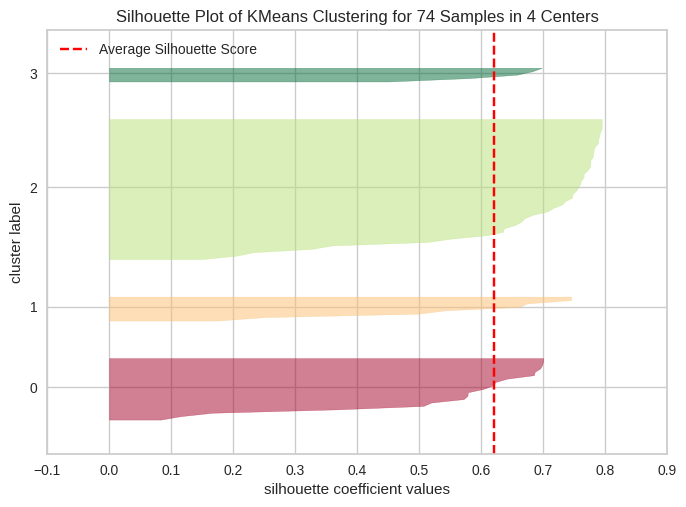

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd628bcba60>,
                     colors='RdYlGn',
                     estimator=KMeans(n_clusters=4, random_state=42))

In [ ]:
silhouette_visualizer(KMeans(4, random_state=42), auto[['mpg','price']], colors='RdYlGn') #higher vals=better separation between clusters

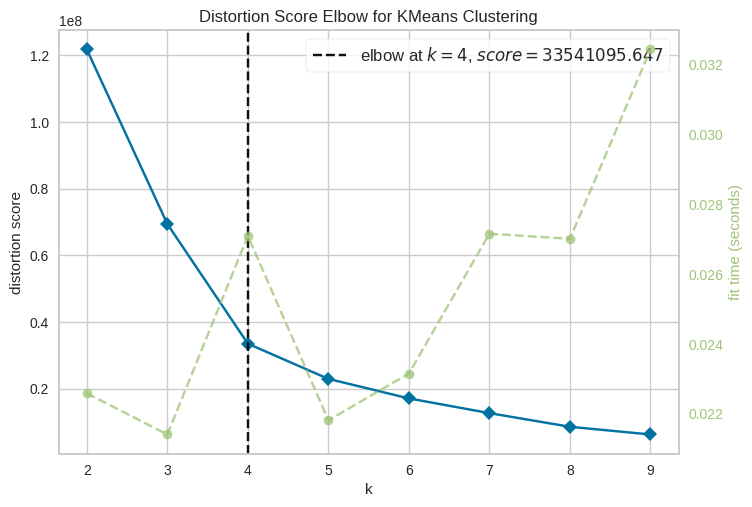

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd628b27f40>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [ ]:
kelbow_visualizer(KMeans(random_state=4), auto[['mpg','price']], k=(2,10))

# AI

TODO

eg chatGPT can interpret vis:
https://www.kdnuggets.com/5-ways-you-can-use-chatgpt-vision-for-data-analysis : 2. Chart Analysis
